In [37]:
import yfinance as yf
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.dates import DateFormatter

In [38]:
BTC_USD = yf.download("BTC-USD", start='2020-01-01', end='2020-12-31', interval='1d')

[*********************100%***********************]  1 of 1 completed


In [39]:
BTC_USD.head(10)

Open         High          Low        Close    Adj Close   
Date                                                                          
2020-01-01  7194.892090  7254.330566  7174.944336  7200.174316  7200.174316  \
2020-01-02  7202.551270  7212.155273  6935.270020  6985.470215  6985.470215   
2020-01-03  6984.428711  7413.715332  6914.996094  7344.884277  7344.884277   
2020-01-04  7345.375488  7427.385742  7309.514160  7410.656738  7410.656738   
2020-01-05  7410.451660  7544.497070  7400.535645  7411.317383  7411.317383   
2020-01-06  7410.452148  7781.867188  7409.292969  7769.219238  7769.219238   
2020-01-07  7768.682129  8178.215820  7768.227539  8163.692383  8163.692383   
2020-01-08  8161.935547  8396.738281  7956.774414  8079.862793  8079.862793   
2020-01-09  8082.295898  8082.295898  7842.403809  7879.071289  7879.071289   
2020-01-10  7878.307617  8166.554199  7726.774902  8166.554199  8166.554199   

                 Volume  
Date                     
2020-01-01  18565664997  
2020-01-02  20802083465  
2020-01-03  28111481032  
2020-01-04  18444271275  
2020-01-05  19725074095  
2020-01-06  23276261598  
2020-01-07  28767291327  
2020-01-08  31672559265  
2020-01-09  24045990466  
2020-01-10  28714583844

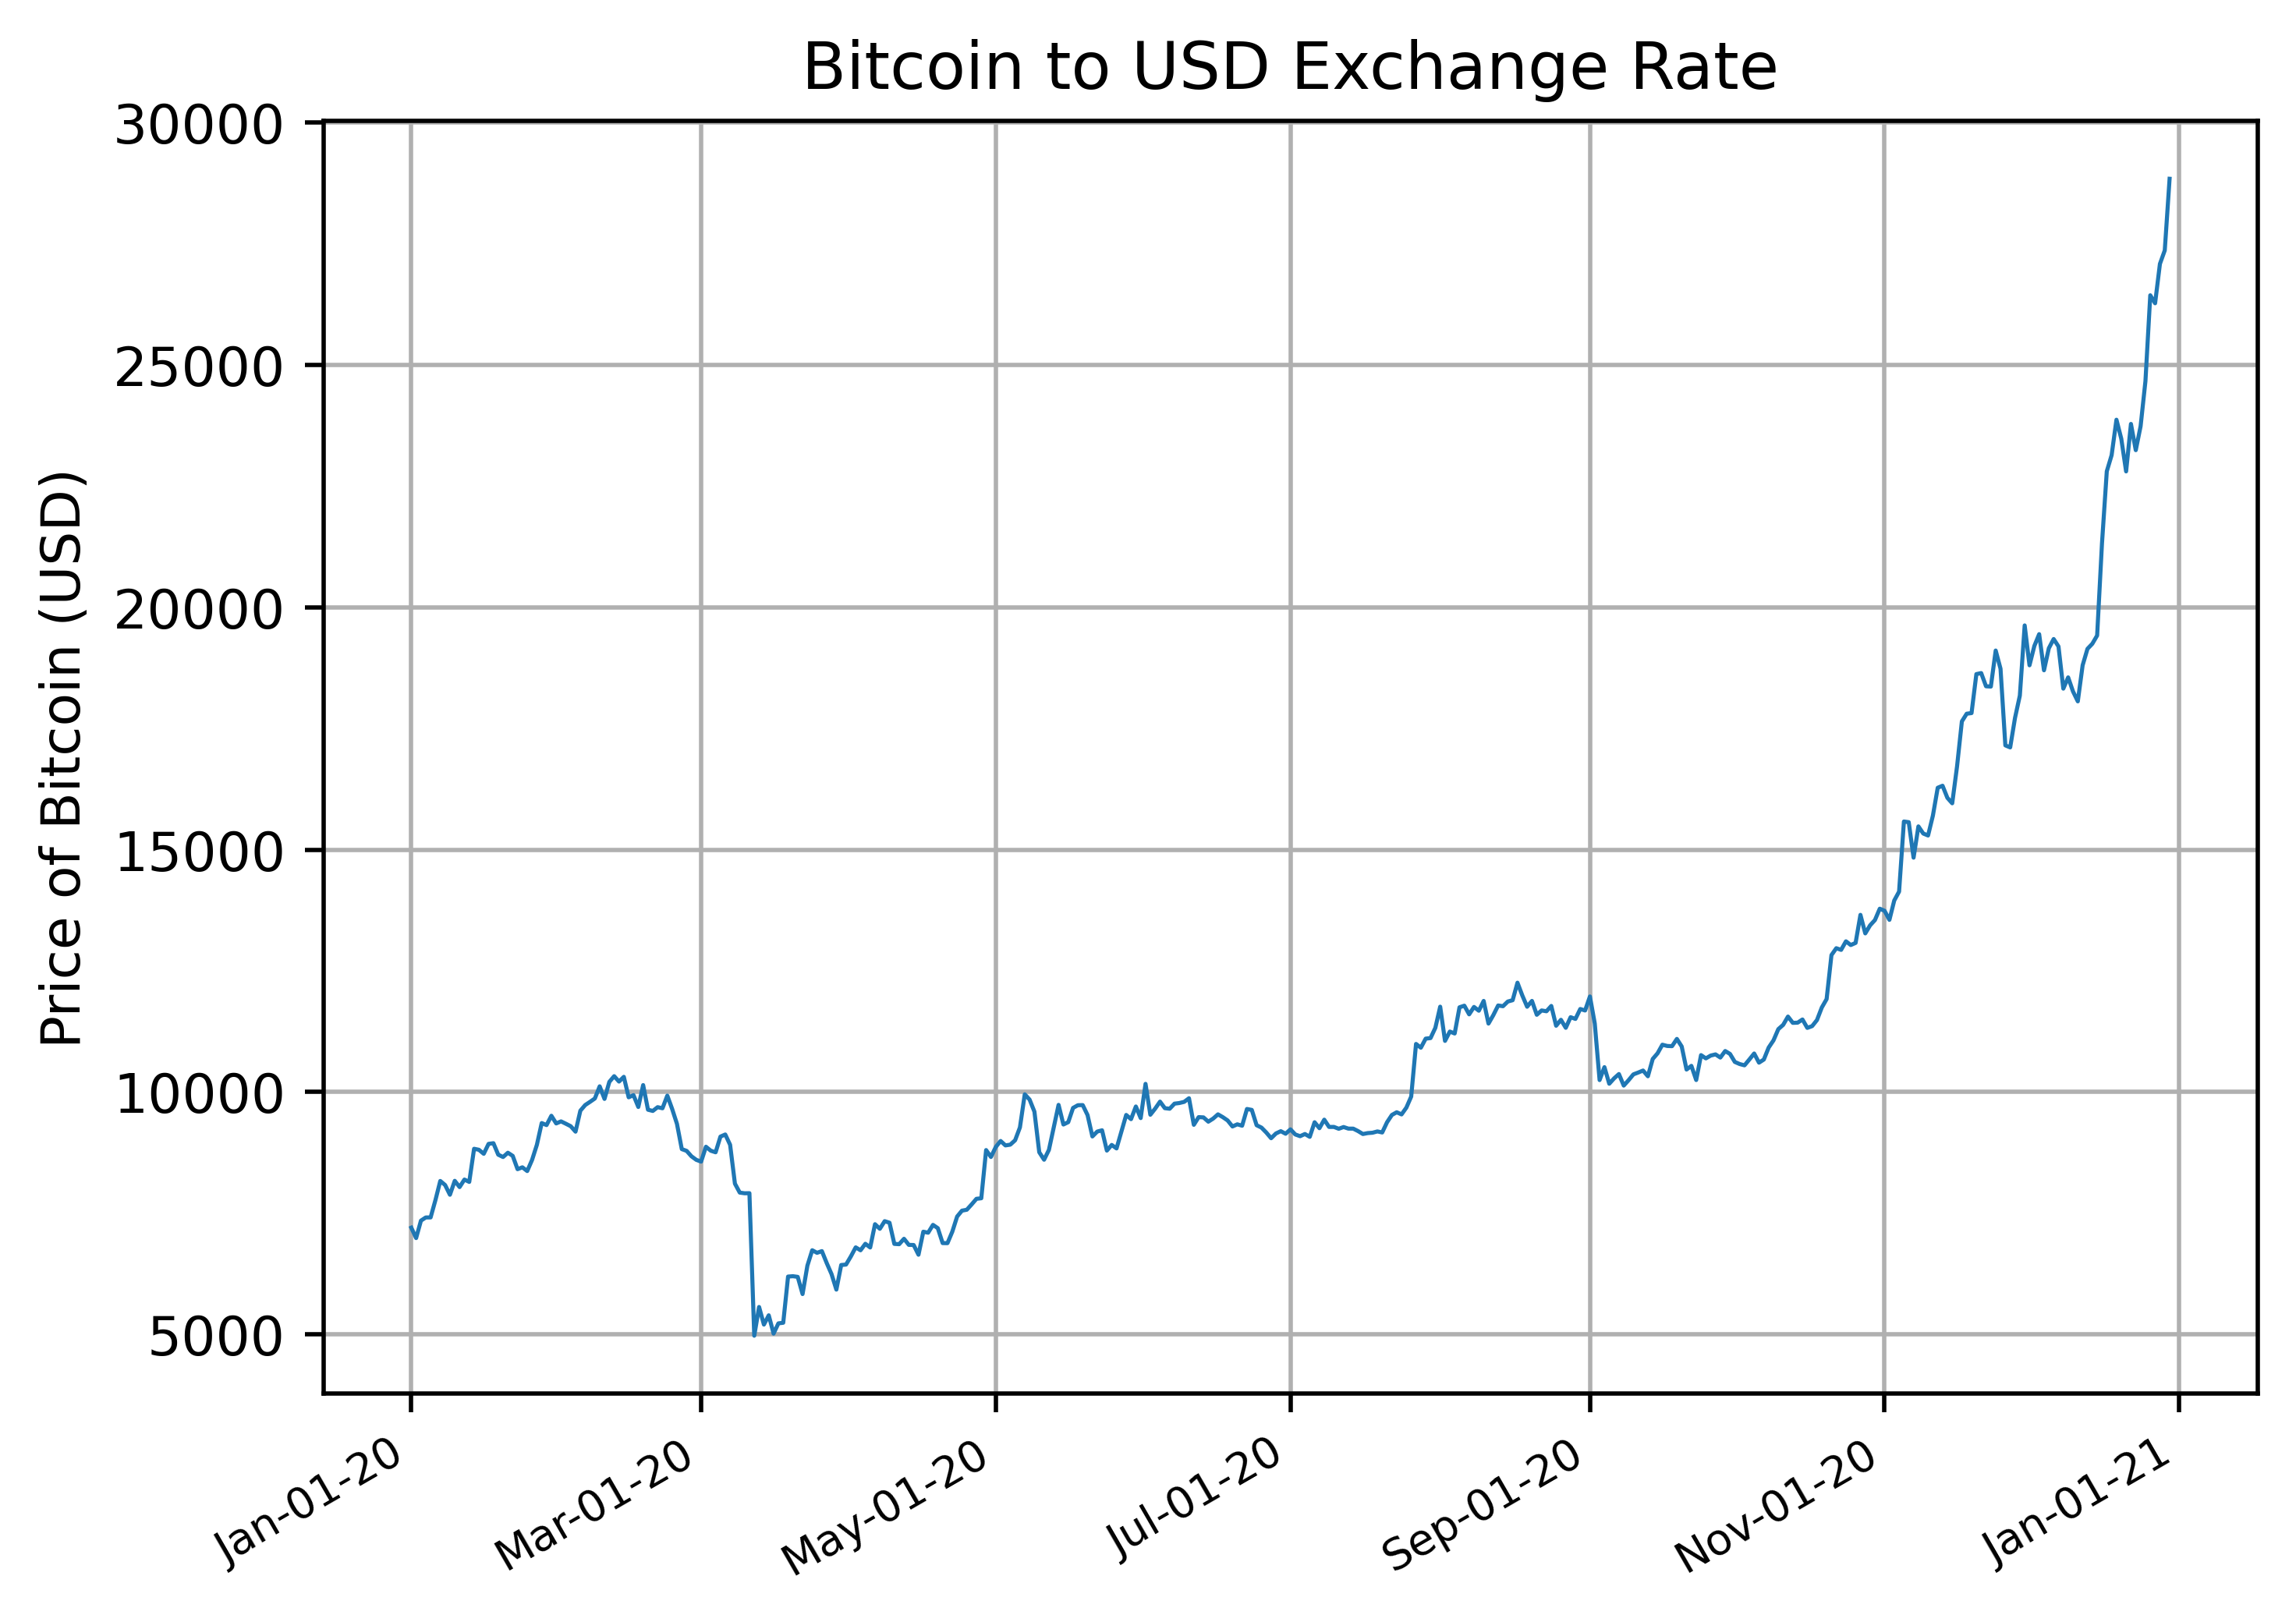

In [40]:
fig, ax = plt.subplots(dpi=500)

# Formatting the date axis
date_format = DateFormatter("%h-%d-%y")
ax.xaxis.set_major_formatter(date_format)
ax.tick_params(axis='x', labelsize=8)
fig.autofmt_xdate()

# Plotting the closing price against the date (1 day interval)
ax.plot(BTC_USD['Close'], lw=0.75)

# Adding labels and title to the plot
ax.set_ylabel('Price of Bitcoin (USD)')
ax.set_title('Bitcoin to USD Exchange Rate')
ax.grid() # adding a grid

# Displaying the price chart
plt.show()

In [41]:
# Computing a 9-day Simple Moving Average with pandas
BTC_USD['SMA_9'] = BTC_USD['Close'].rolling(window=9, min_periods=1).mean()
# Computing a 9-day Simple Moving Average with pandas
BTC_USD['SMA_30'] = BTC_USD['Close'].rolling(window=30, min_periods=1).mean()

In [42]:
BTC_USD.tail(5)

Open          High           Low         Close   
Date                                                                 
2020-12-26  24677.015625  26718.070312  24522.689453  26437.037109  \
2020-12-27  26439.373047  28288.839844  25922.769531  26272.294922   
2020-12-28  26280.822266  27389.111328  26207.640625  27084.808594   
2020-12-29  27081.810547  27370.720703  25987.298828  27362.437500   
2020-12-30  27360.089844  28937.740234  27360.089844  28840.953125   

               Adj Close       Volume         SMA_9        SMA_30  
Date                                                               
2020-12-26  26437.037109  48332647295  23905.591363  20518.139062  
2020-12-27  26272.294922  66479895605  24253.850694  20823.602148  
2020-12-28  27084.808594  49056742893  24611.070312  21135.848633  
2020-12-29  27362.437500  45265946774  25042.752821  21442.013737  
2020-12-30  28840.953125  51287442704  25713.627387  21749.184310

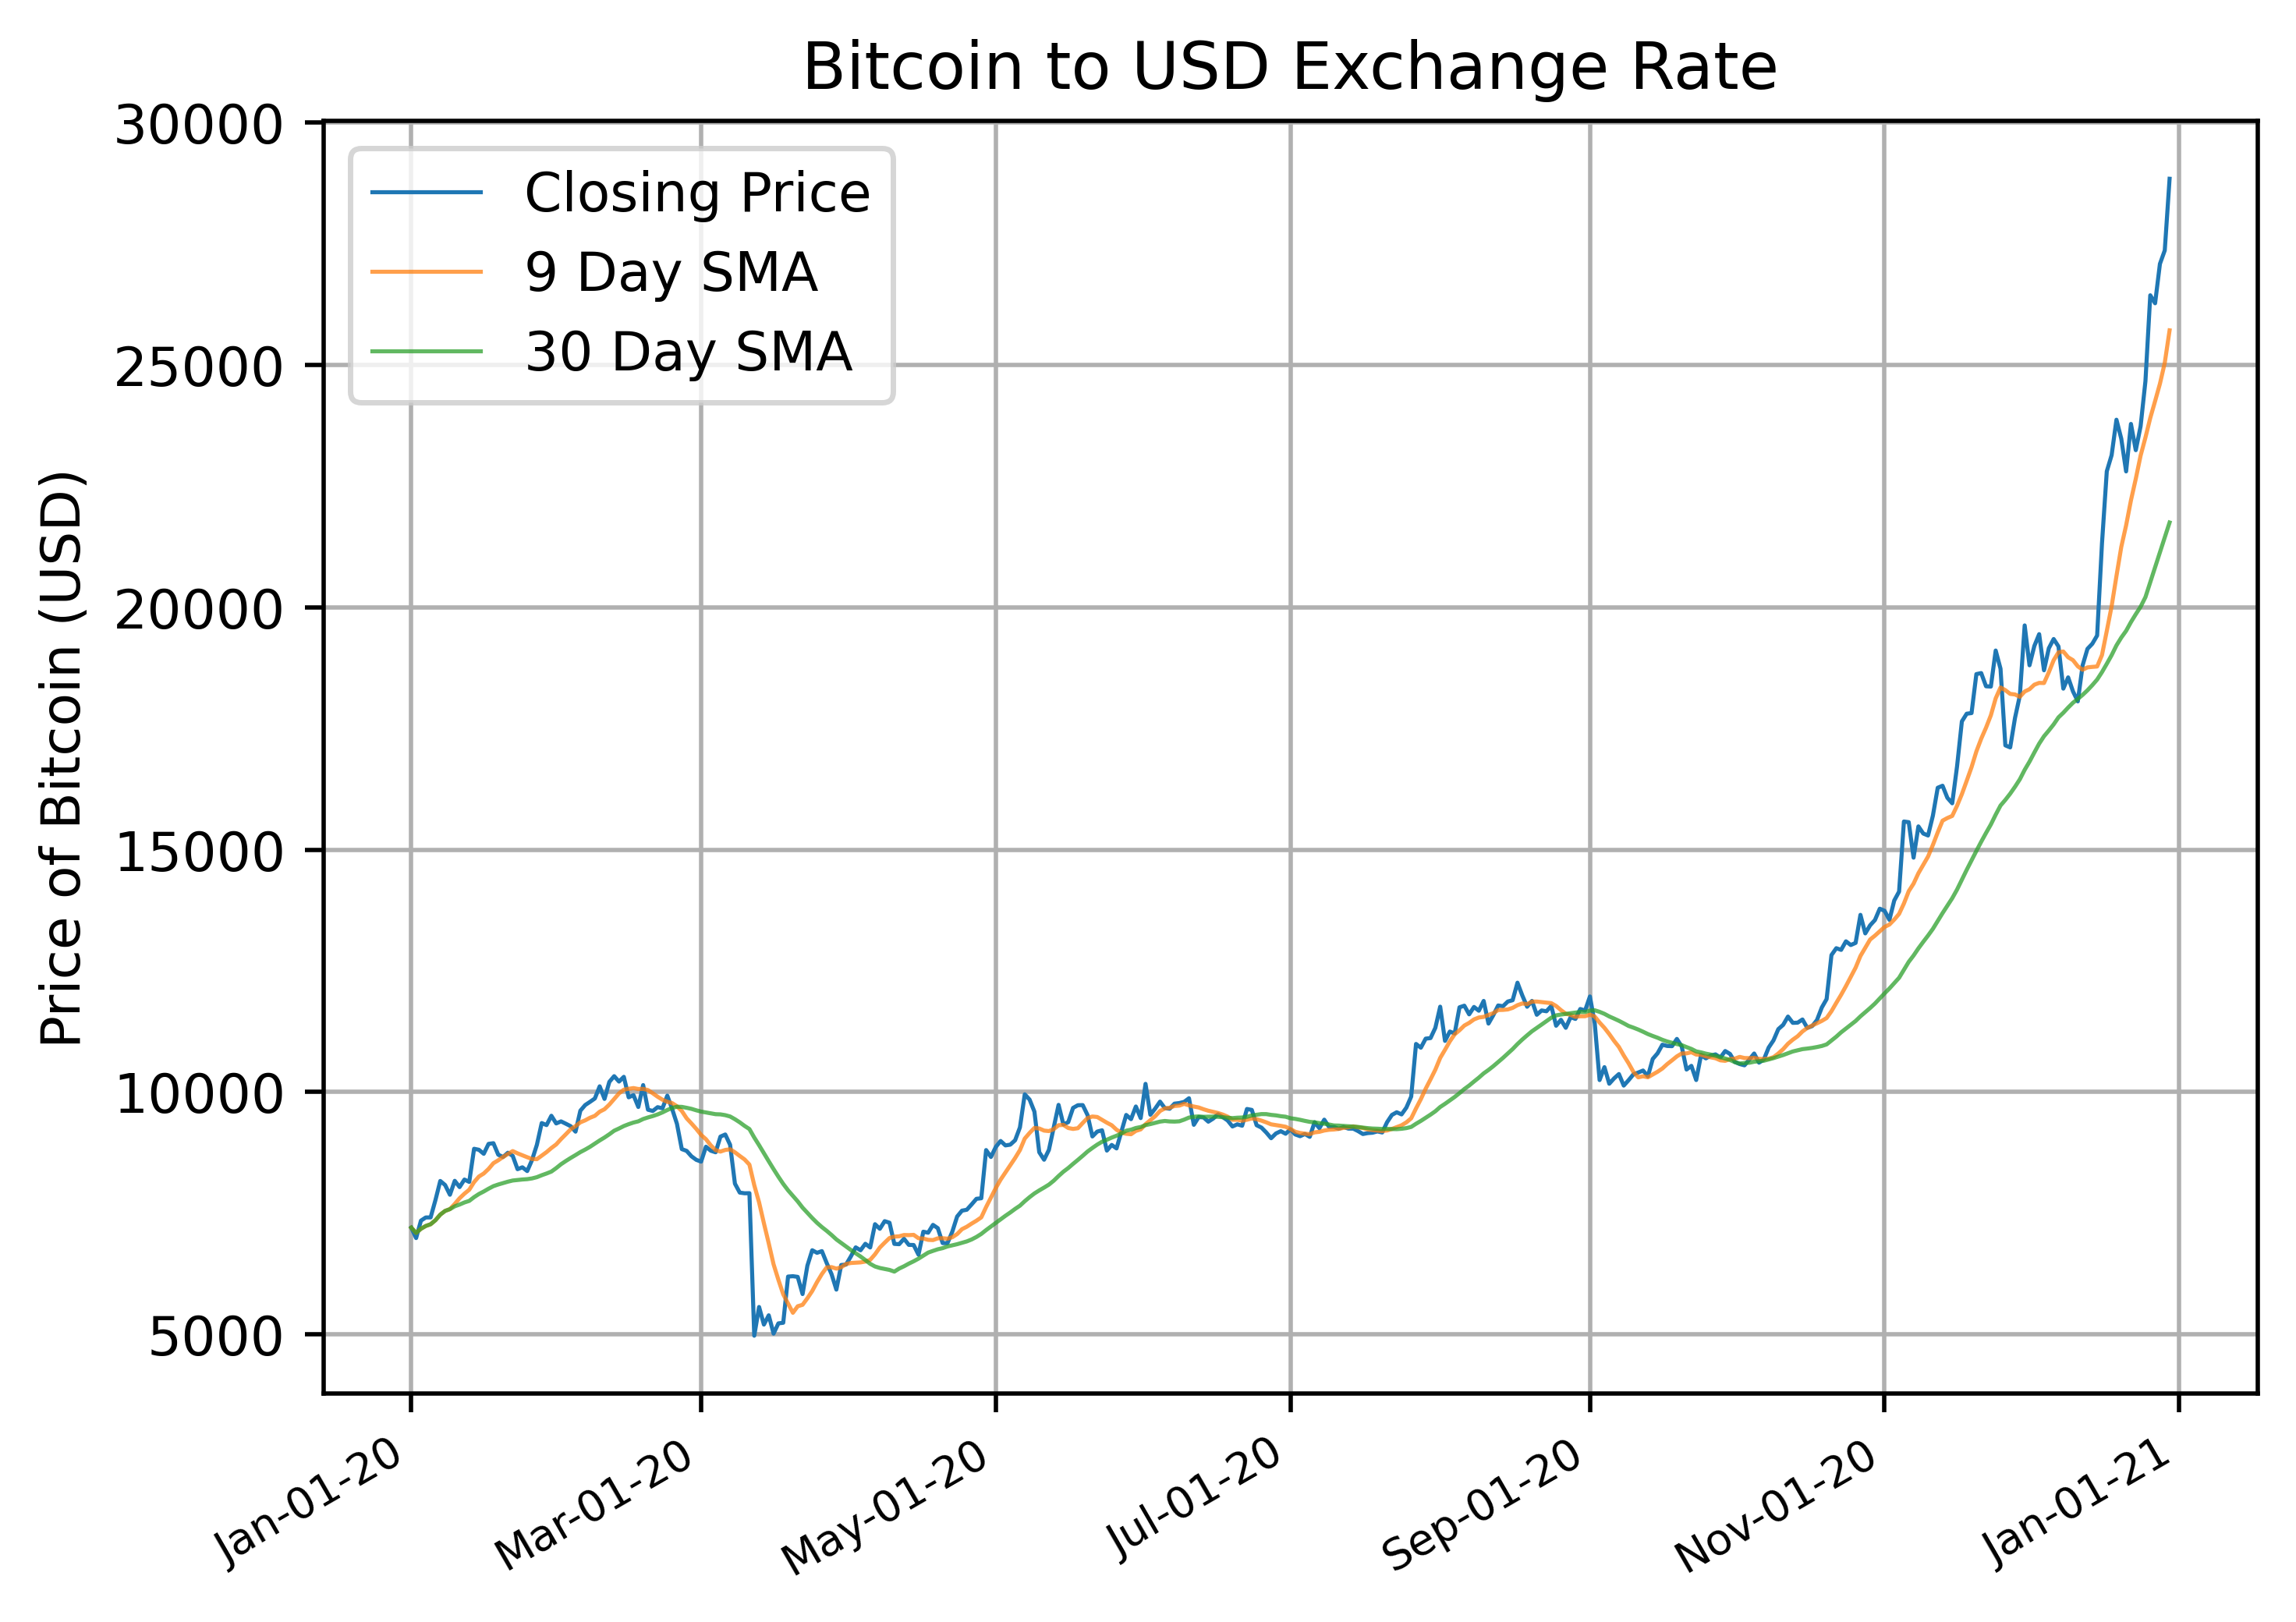

In [43]:
fig, ax = plt.subplots(dpi=500)

# Formatting the date axis
date_format = DateFormatter("%h-%d-%y")
ax.xaxis.set_major_formatter(date_format)
ax.tick_params(axis='x', labelsize=8)
fig.autofmt_xdate()

# Plotting the closing price against the date (1 day interval)
ax.plot(BTC_USD['Close'], lw=0.75, label='Closing Price') # Added label

"""
Below we plot the 9 and 30 day Simple Moving Averages and give them the appropriate label
"""
ax.plot(BTC_USD['SMA_9'], lw=0.75, alpha=0.75, label='9 Day SMA')
ax.plot(BTC_USD['SMA_30'], lw=0.75, alpha=0.75, label='30 Day SMA')

ax.set_ylabel('Price of Bitcoin (USD)')
ax.set_title('Bitcoin to USD Exchange Rate')
ax.grid() # adding a grid
ax.legend()
plt.show()

In [44]:
# Create a pandas dataframe that is the same size as the BTC_USD dataframe and covers the same dates
trade_signals = pd.DataFrame(index=BTC_USD.index)

# Define the intervals for the Fast and Slow Simple Moving Averages (in days)
short_interval = 10
long_interval = 40

# Compute the Simple Moving Averages and add it to the dateframe as new columns
trade_signals['Short'] = BTC_USD['Close'].rolling(window=short_interval, min_periods=1).mean()
trade_signals['Long'] = BTC_USD['Close'].rolling(window=long_interval, min_periods=1).mean()

In [45]:
# Create a new column populated with zeros
trade_signals['Signal'] = 0.0

# Wherever the Shorter term SMA is above the Longer term SMA, set the Signal column to 1, otherwise 0
trade_signals['Signal'] = np.where(trade_signals['Short'] > trade_signals['Long'], 1.0, 0.0)   

In [46]:
trade_signals['Position'] = trade_signals['Signal'].diff()

In [47]:
trade_signals.head(10)

Short         Long  Signal  Position
Date                                                  
2020-01-01  7200.174316  7200.174316     0.0       NaN
2020-01-02  7092.822266  7092.822266     0.0       0.0
2020-01-03  7176.842936  7176.842936     0.0       0.0
2020-01-04  7235.296387  7235.296387     0.0       0.0
2020-01-05  7270.500586  7270.500586     0.0       0.0
2020-01-06  7353.620361  7353.620361     0.0       0.0
2020-01-07  7469.344936  7469.344936     0.0       0.0
2020-01-08  7545.659668  7545.659668     0.0       0.0
2020-01-09  7582.705404  7582.705404     0.0       0.0
2020-01-10  7641.090283  7641.090283     0.0       0.0

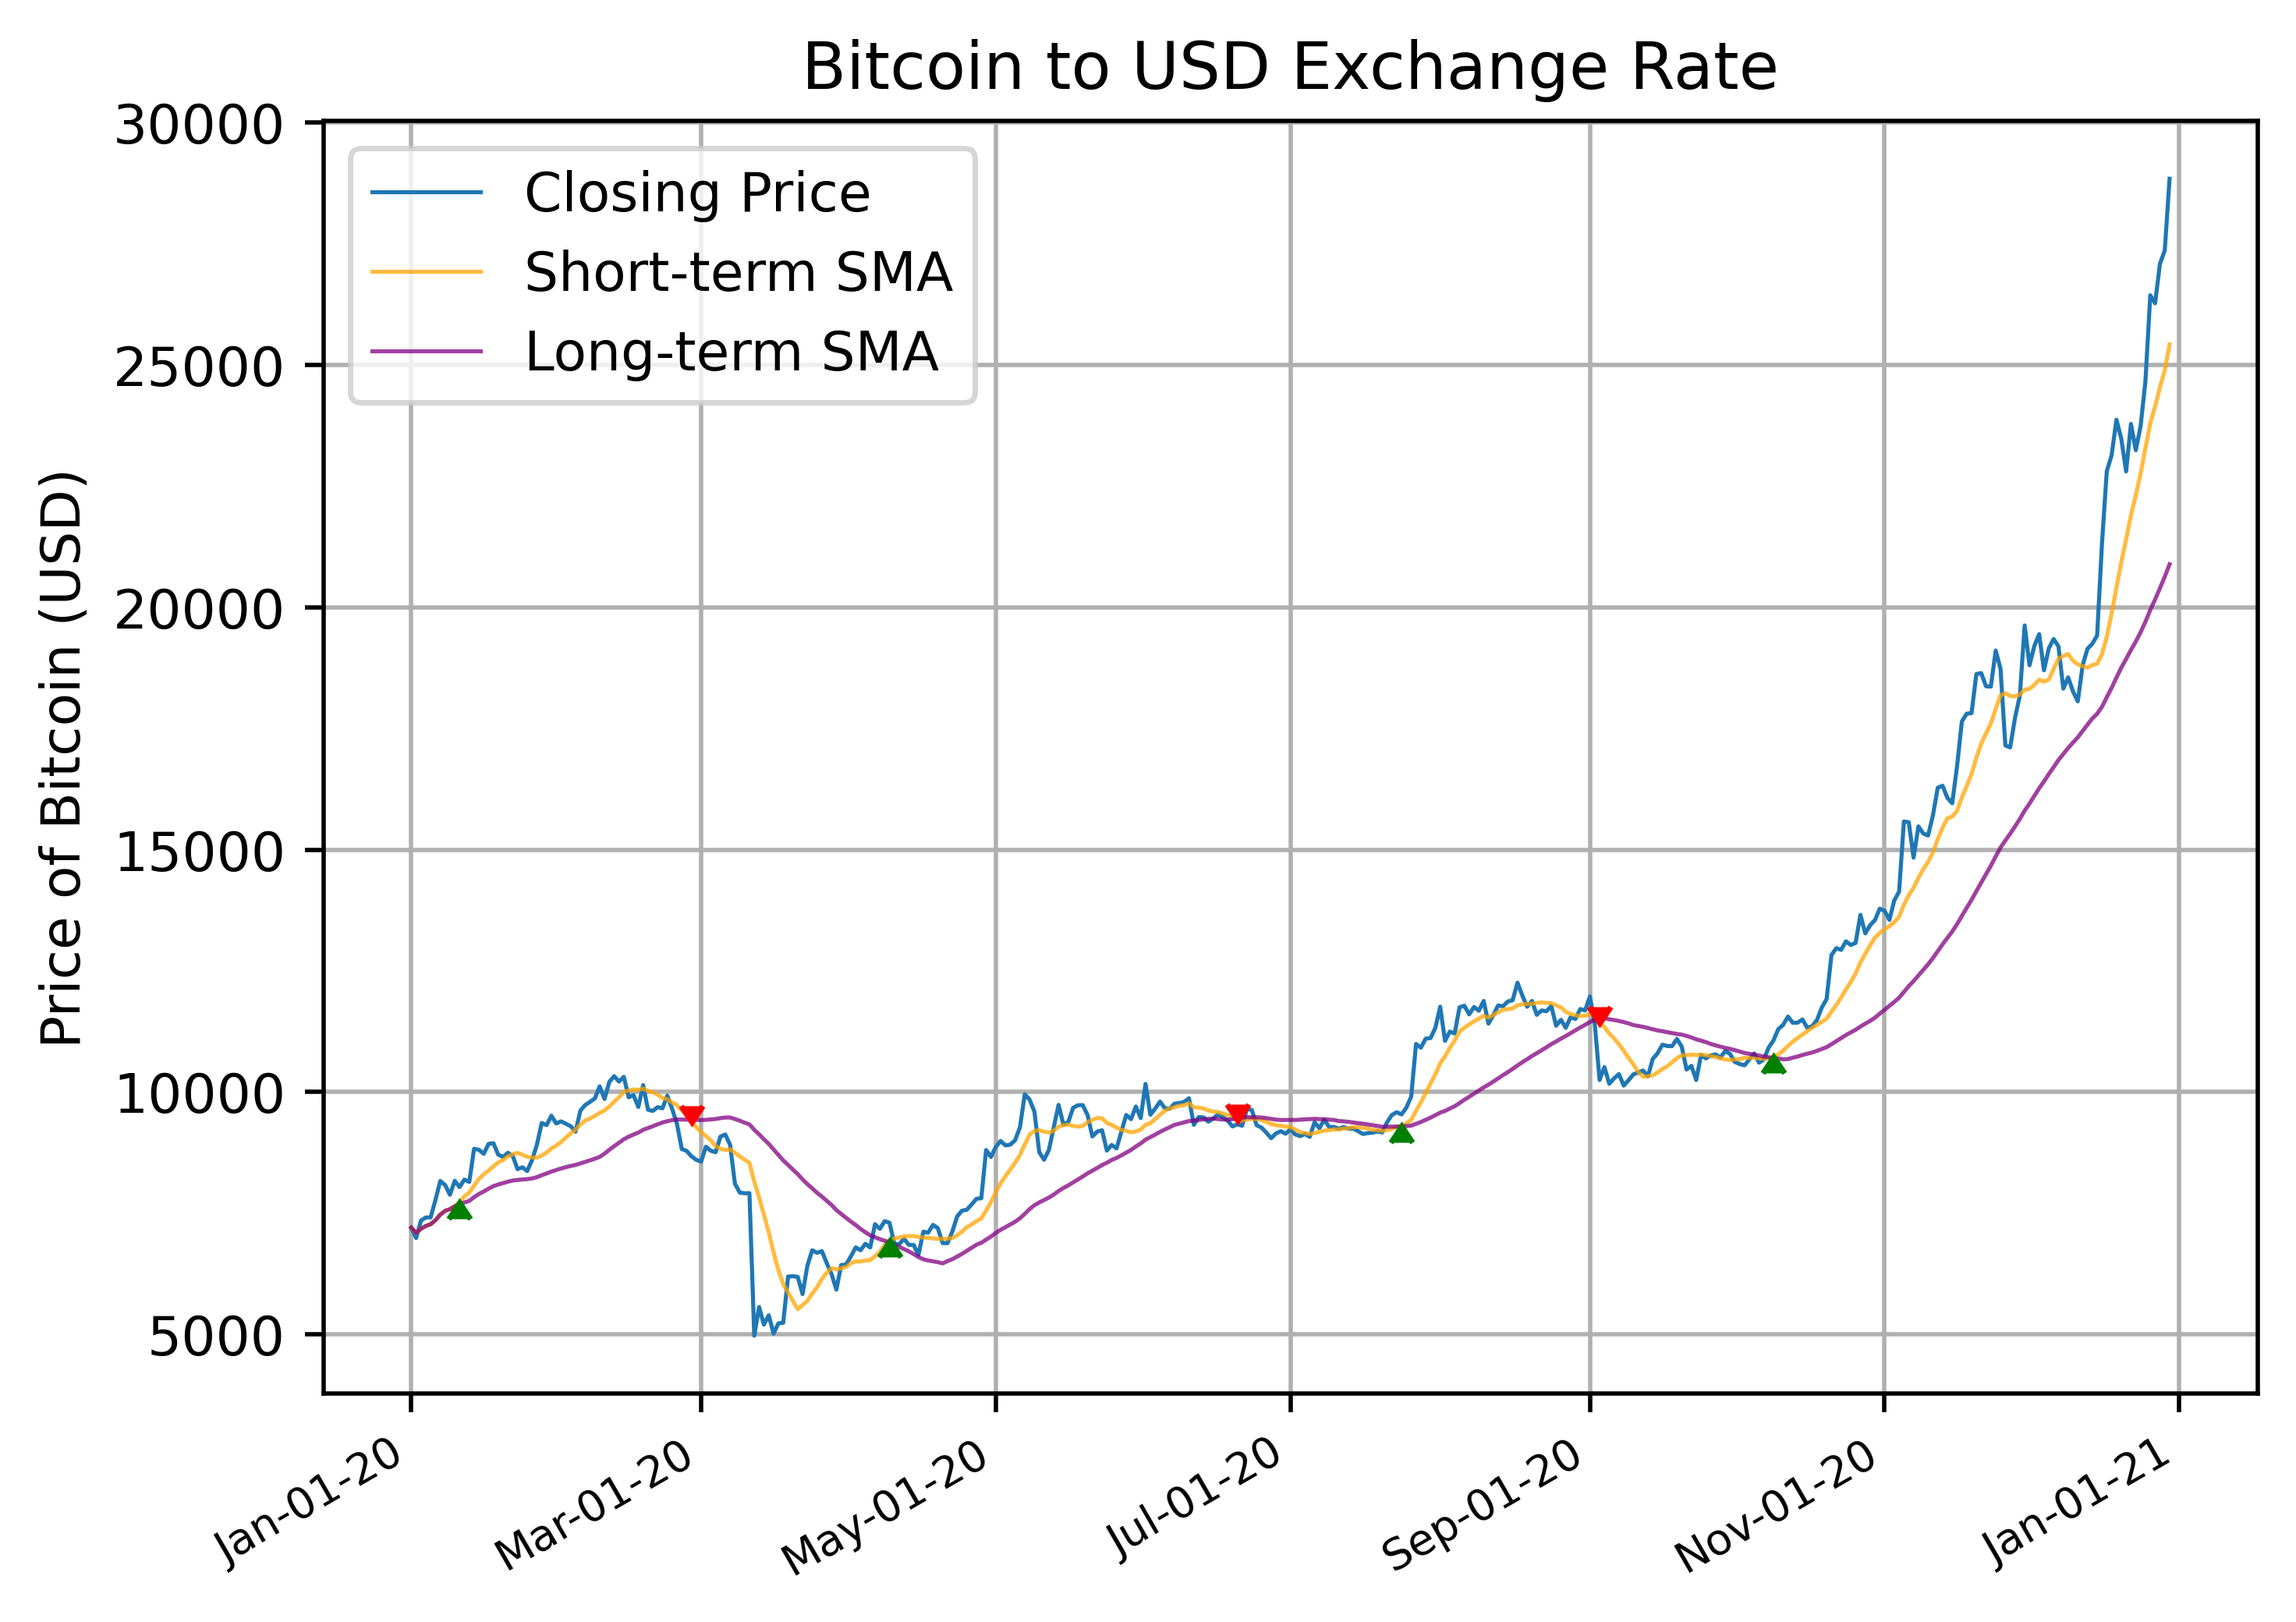

In [48]:
fig, ax = plt.subplots(dpi=500)

# Formatting the date axis
date_format = DateFormatter("%h-%d-%y")
ax.xaxis.set_major_formatter(date_format)
ax.tick_params(axis='x', labelsize=8)
fig.autofmt_xdate()


# Plotting the Bitcoin closing price against the date (1 day interval)
ax.plot(BTC_USD['Close'], lw=0.75, label='Closing Price')

# Plot the shorter-term moving average
ax.plot(trade_signals['Short'], lw=0.75, alpha=0.75, color='orange', label='Short-term SMA')

# Plot the longer-term moving average
ax.plot(trade_signals['Long'], lw=0.75, alpha=0.75, color='purple', label='Long-term SMA')


# Adding green arrows to indicate buy orders
ax.plot(trade_signals.loc[trade_signals['Position']==1.0].index, trade_signals.Short[trade_signals['Position'] == 1.0],
 marker=6, ms=4, linestyle='none', color='green')

 # Adding red arrows to indicate sell orders
ax.plot(trade_signals.loc[trade_signals['Position'] == -1.0].index, trade_signals.Short[trade_signals['Position'] == -1.0],
 marker=7, ms=4, linestyle='none', color='red')


# Adding labels and title to the plot
ax.set_ylabel('Price of Bitcoin (USD)')
ax.set_title('Bitcoin to USD Exchange Rate')
ax.grid() # adding a grid
ax.legend() # adding a legend

# Displaying the price chart
plt.show()

In [49]:
# Define how much money you will start with (in USD)
initial_balance = 10000.0 # ten thousand USD

# Create dataframe containing all the dates considered
backtest = pd.DataFrame(index=trade_signals.index)

# Add column containing the daily percent returns of Bitcoin
backtest['BTC_Return'] = BTC_USD['Close'] / BTC_USD['Close'].shift(1) # Current closing price / yesterday's closing price


In [50]:

# Add column containing the daily percent returns of the Moving Average Crossover strategy
backtest['Alg_Return'] = np.where(trade_signals.Signal == 1, backtest.BTC_Return, 1.0)

# Add column containing the daily value of the portfolio using the Crossover strategy
backtest['Balance'] = initial_balance * backtest.Alg_Return.cumprod() # cumulative product

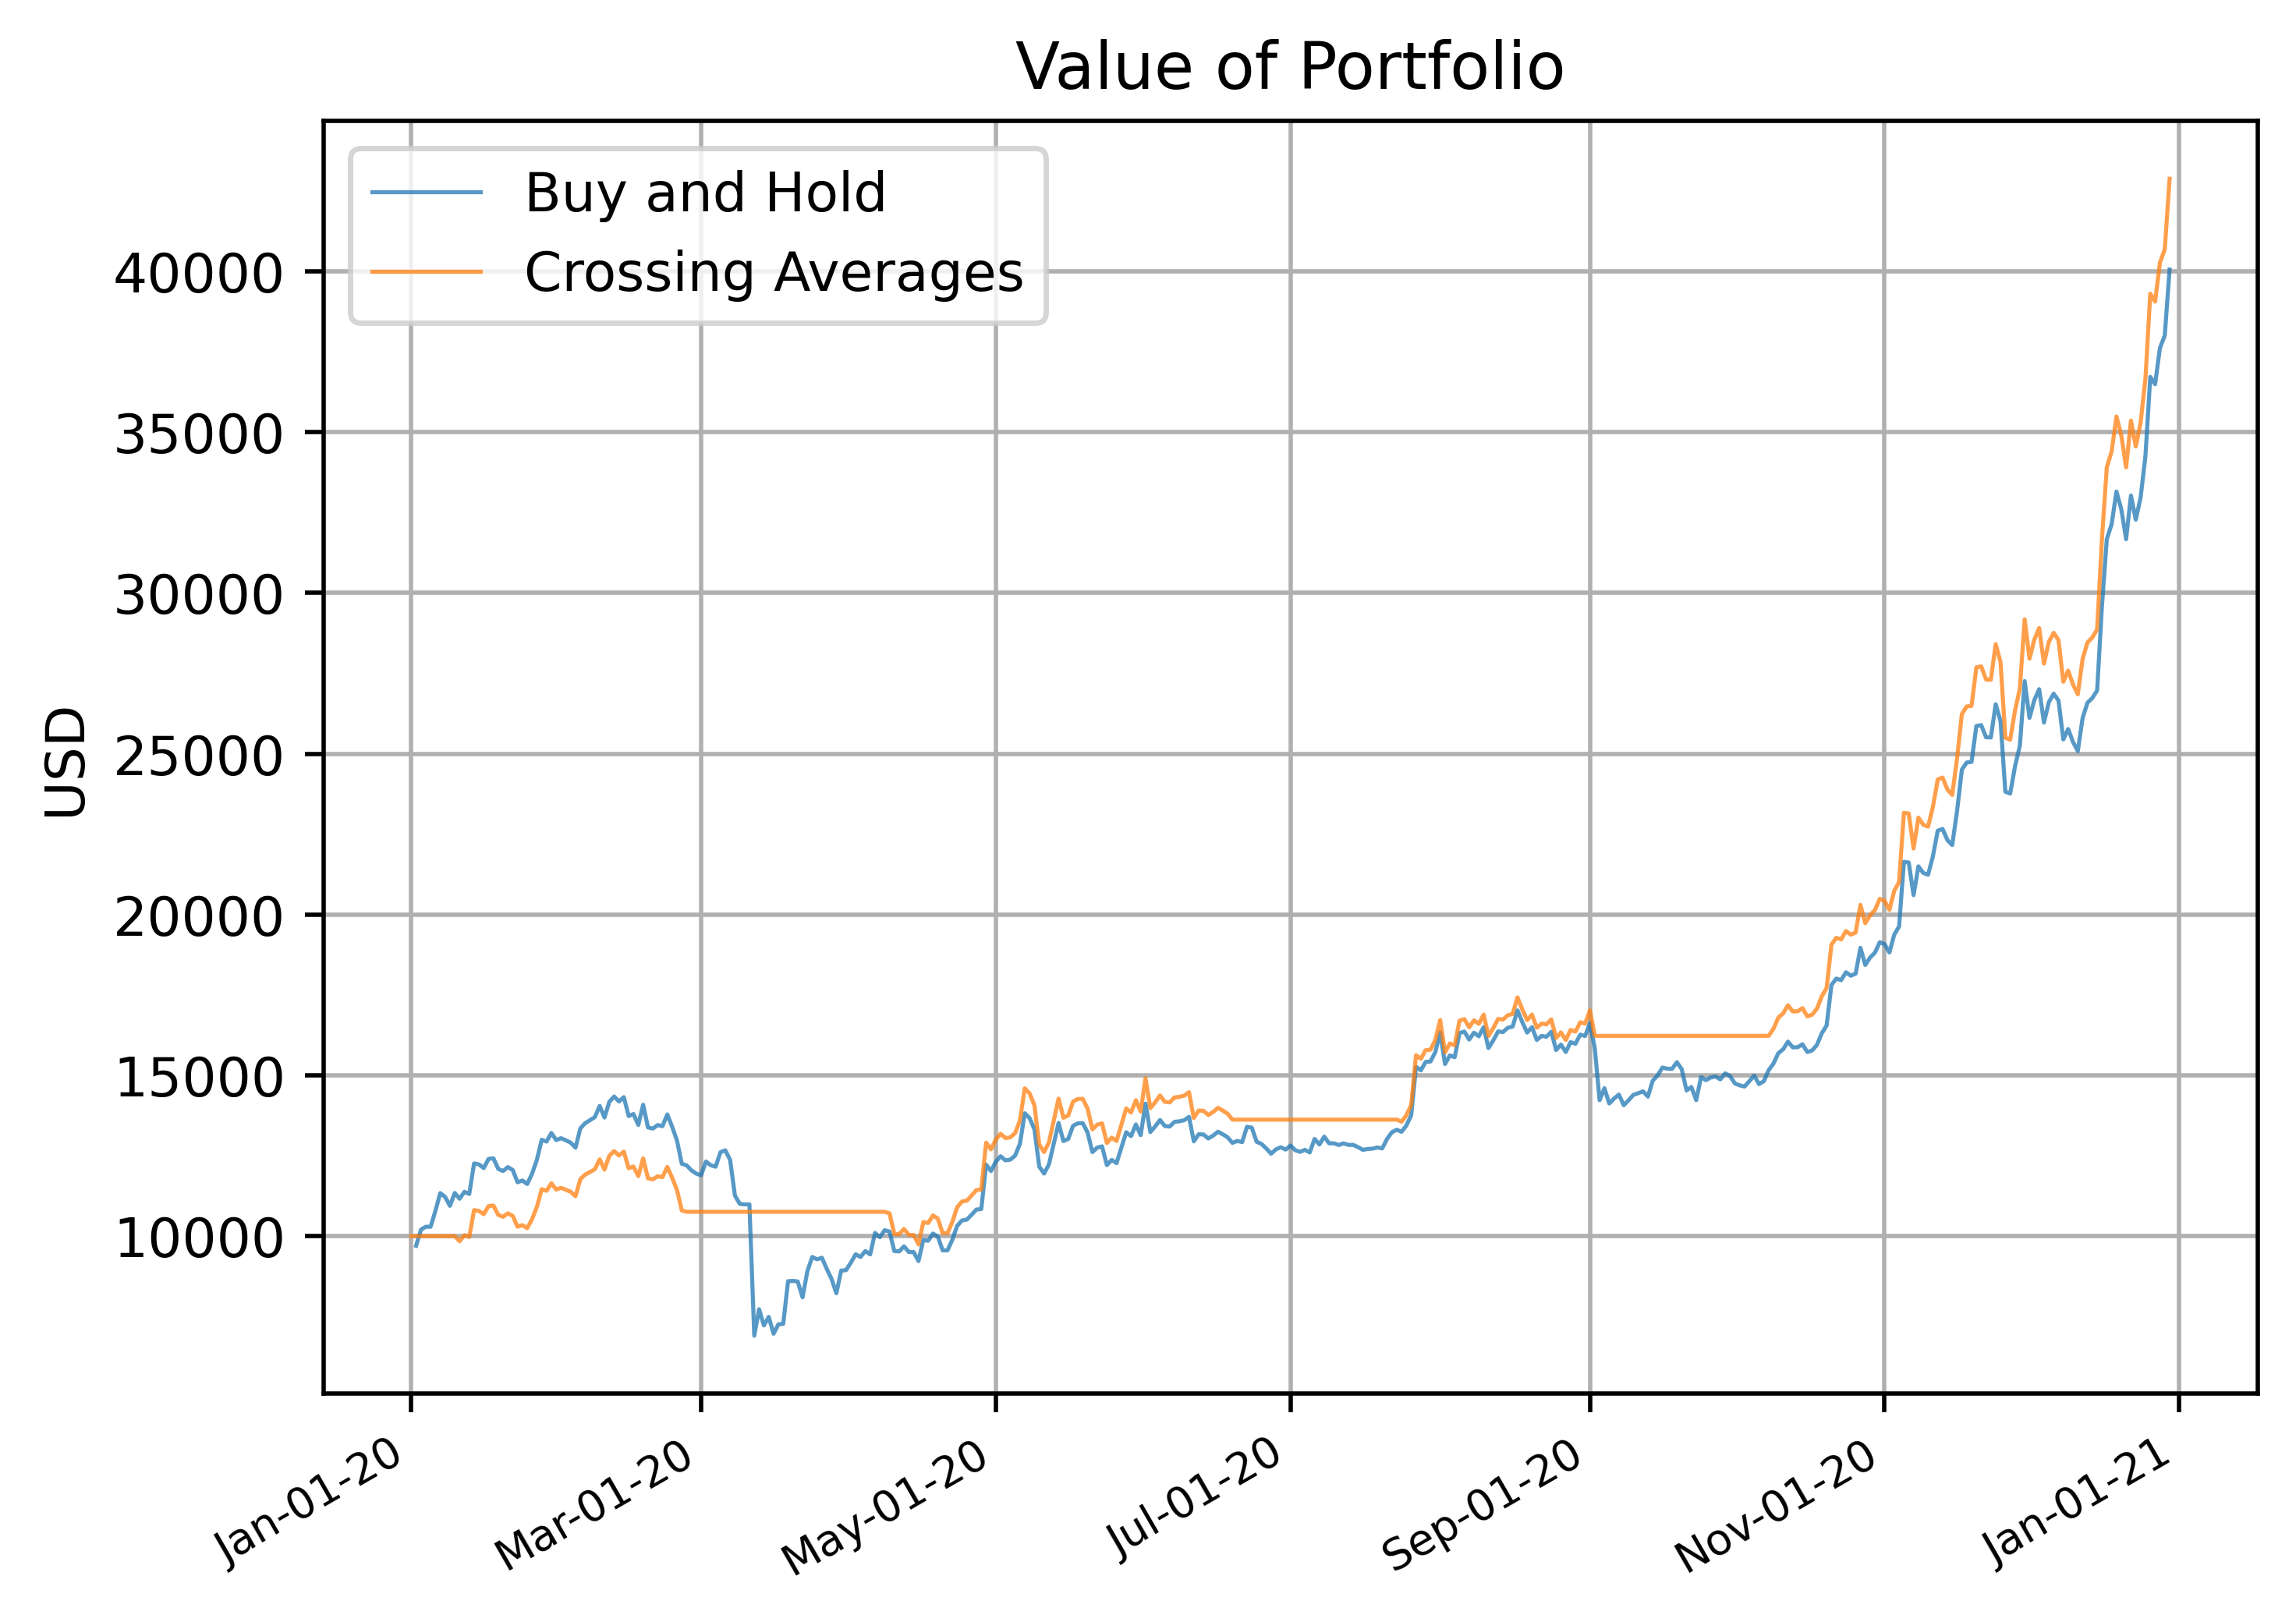

In [51]:
fig, ax = plt.subplots(dpi=500)

# Formatting the date axis
date_format = DateFormatter("%h-%d-%y")
ax.xaxis.set_major_formatter(date_format)
ax.tick_params(axis='x', labelsize=8)
fig.autofmt_xdate()

# Plotting the value of Buy and Hold Strategy
ax.plot(initial_balance*backtest.BTC_Return.cumprod(), lw=0.75, alpha=0.75, label='Buy and Hold')

# Plotting total value of Crossing Averages Strategy
ax.plot(backtest['Balance'], lw=0.75, alpha=0.75, label='Crossing Averages')

# Adding labels and title to the plot
ax.set_ylabel('USD')
ax.set_title('Value of Portfolio')
ax.grid() # adding a grid
ax.legend() # adding a legend

# Displaying the price chart
plt.show()

In [52]:
ETH_USD = yf.download("ETH-USD", start='2021-01-01', end='2021-12-31', interval='1d')

[*********************100%***********************]  1 of 1 completed


In [53]:
ETH_USD.head(10)

Open         High          Low        Close    Adj Close   
Date                                                                          
2021-01-01   737.708374   749.201843   719.792236   730.367554   730.367554  \
2021-01-02   730.402649   786.798462   718.109497   774.534973   774.534973   
2021-01-03   774.511841  1006.565002   771.561646   975.507690   975.507690   
2021-01-04   977.058838  1153.189209   912.305359  1040.233032  1040.233032   
2021-01-05  1041.498779  1129.371460   986.811279  1100.006104  1100.006104   
2021-01-06  1101.005005  1209.428589  1064.233398  1207.112183  1207.112183   
2021-01-07  1208.078369  1282.579590  1167.443115  1225.678101  1225.678101   
2021-01-08  1225.967896  1273.827515  1076.081543  1224.197144  1224.197144   
2021-01-09  1223.740479  1303.871826  1182.270386  1281.077271  1281.077271   
2021-01-10  1280.871094  1347.926147  1194.715576  1262.246704  1262.246704   

                 Volume  
Date                     
2021-01-01  13652004358  
2021-01-02  19740771179  
2021-01-03  45200463368  
2021-01-04  56945985763  
2021-01-05  41535932781  
2021-01-06  44699914188  
2021-01-07  40468027280  
2021-01-08  44334826666  
2021-01-09  33233105361  
2021-01-10  40616938053

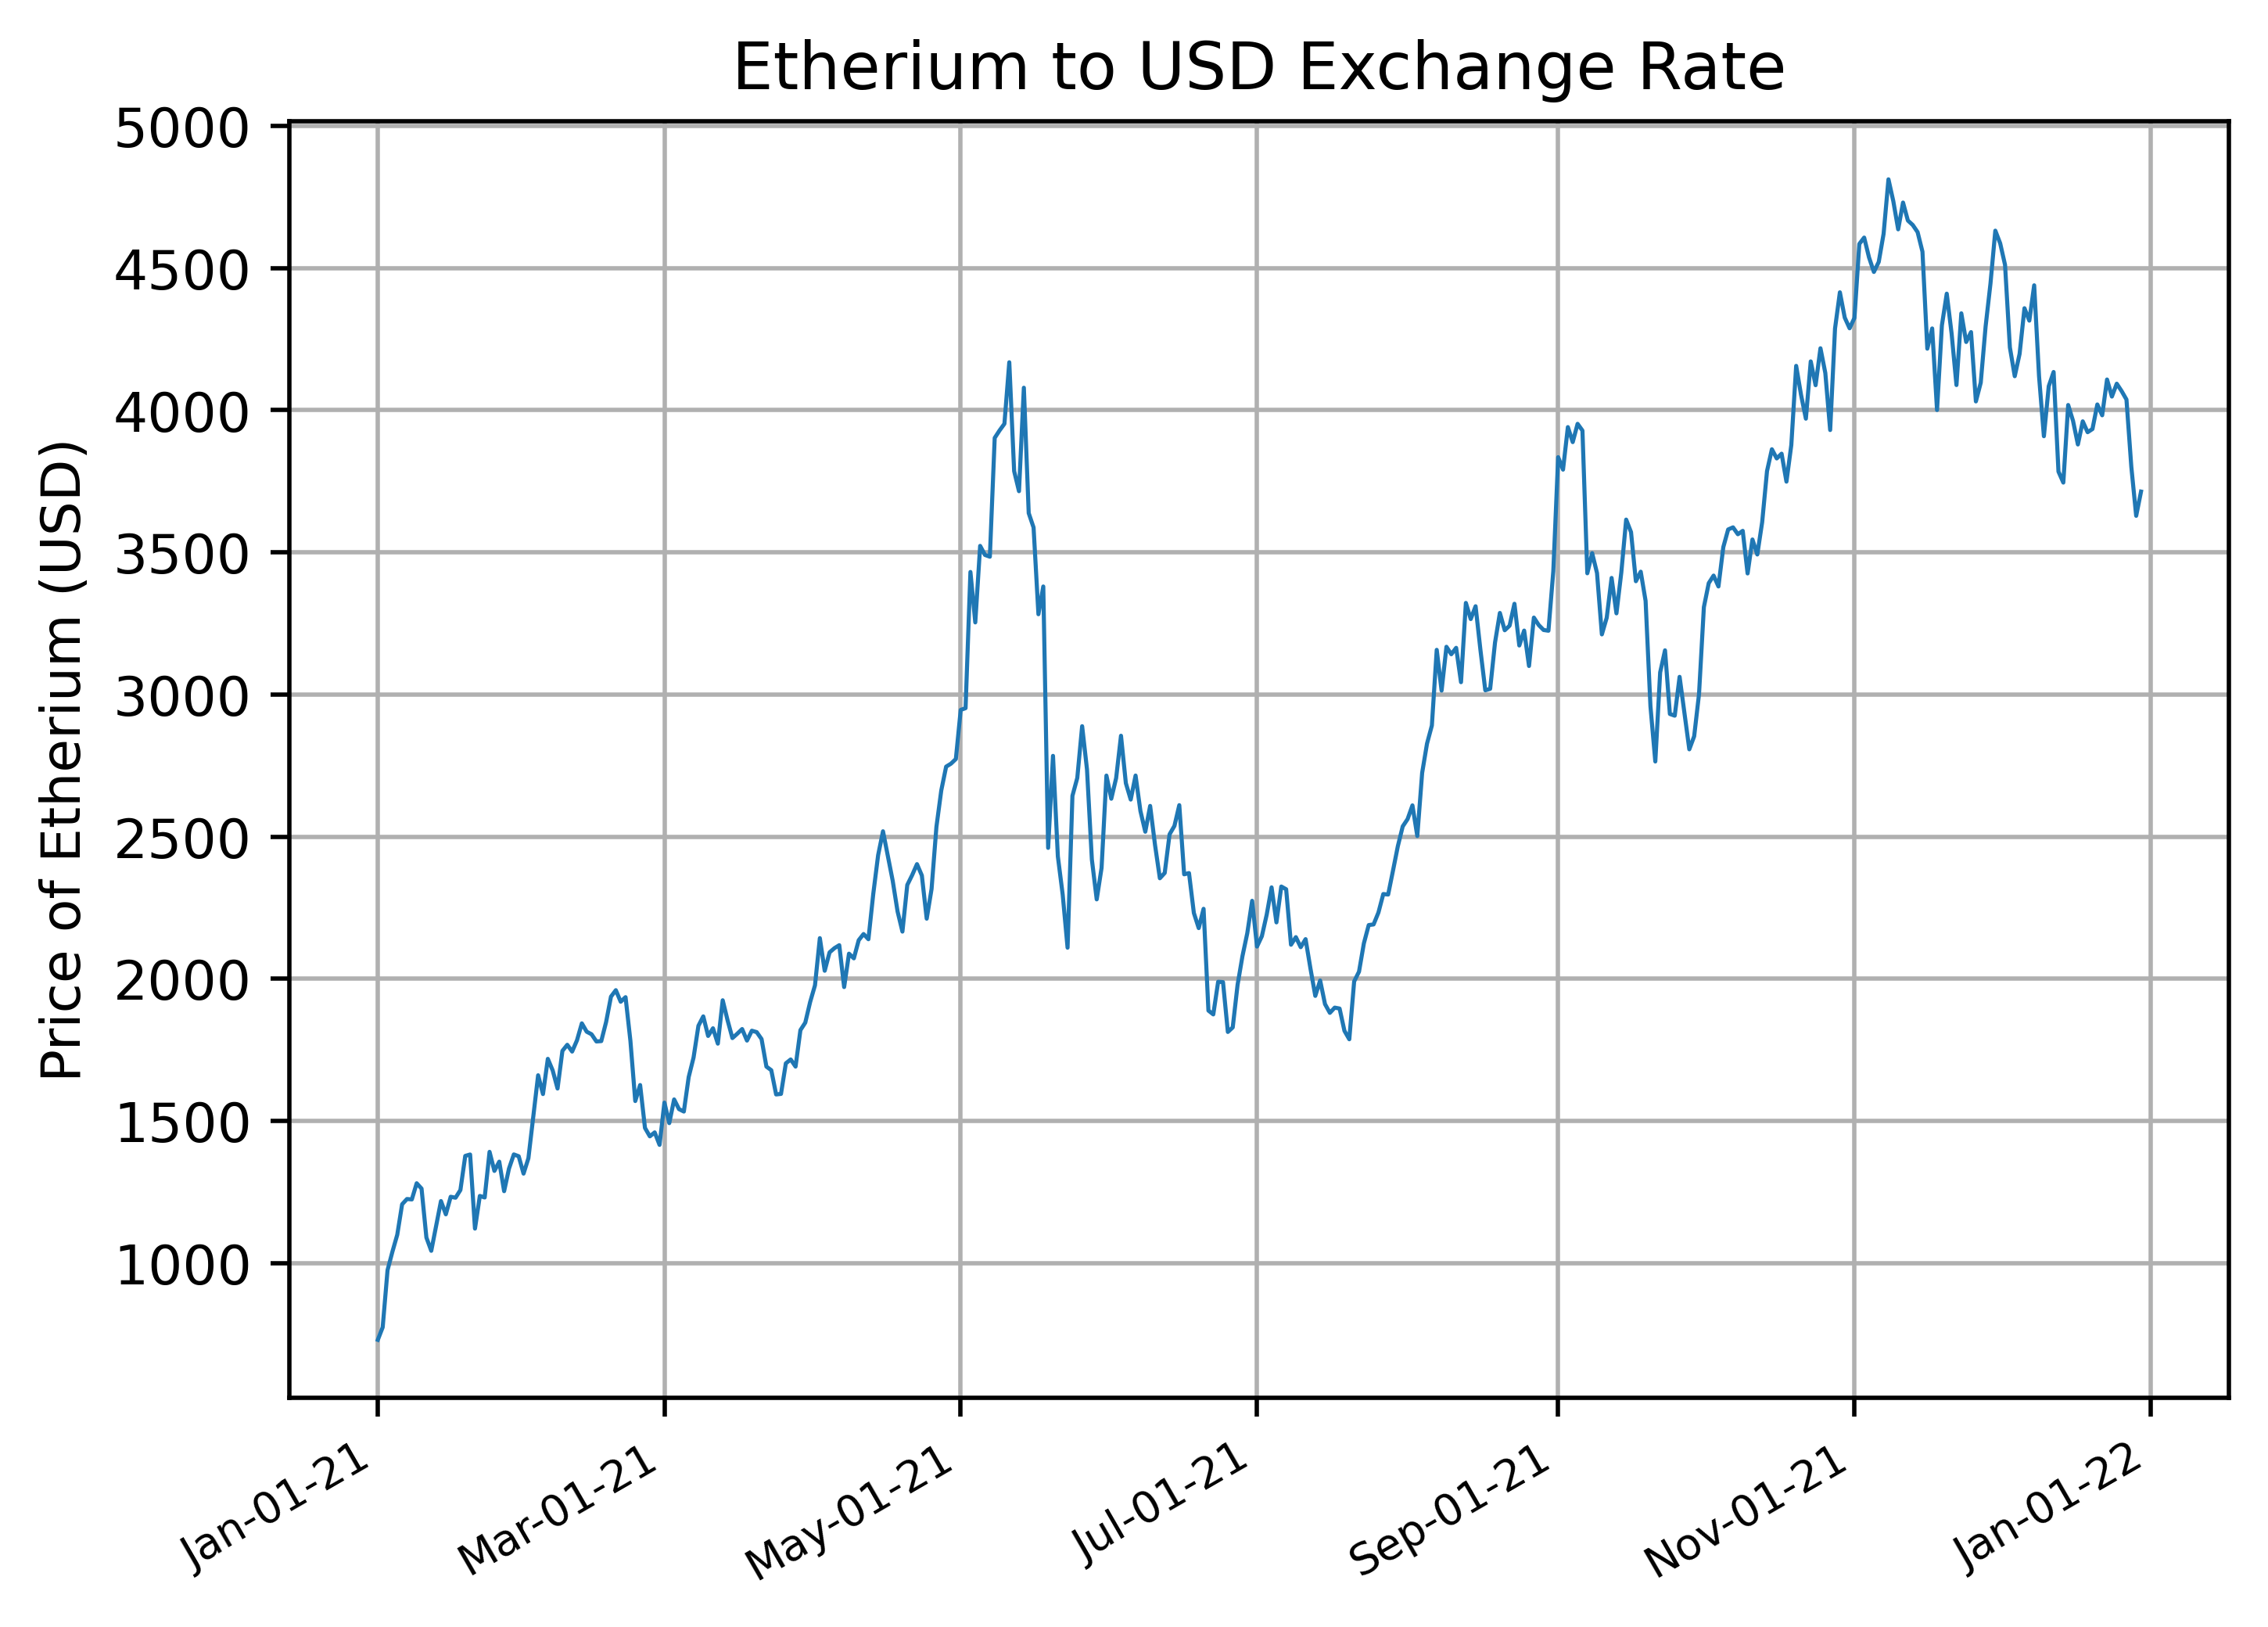

In [54]:
fig1, ax1 = plt.subplots(dpi=500)

date_format = DateFormatter("%h-%d-%y")
ax1.xaxis.set_major_formatter(date_format)
ax1.tick_params(axis='x', labelsize=8)
fig1.autofmt_xdate()


ax1.plot(ETH_USD['Close'], lw=0.75)

ax1.set_ylabel('Price of Etherium (USD)')
ax1.set_title('Etherium to USD Exchange Rate')
ax1.grid() 
plt.show()

In [55]:
ETH_USD['SMA_10'] = ETH_USD['Close'].rolling(window=10, min_periods=1).mean()
ETH_USD['SMA_40'] = ETH_USD['Close'].rolling(window=40, min_periods=1).mean()

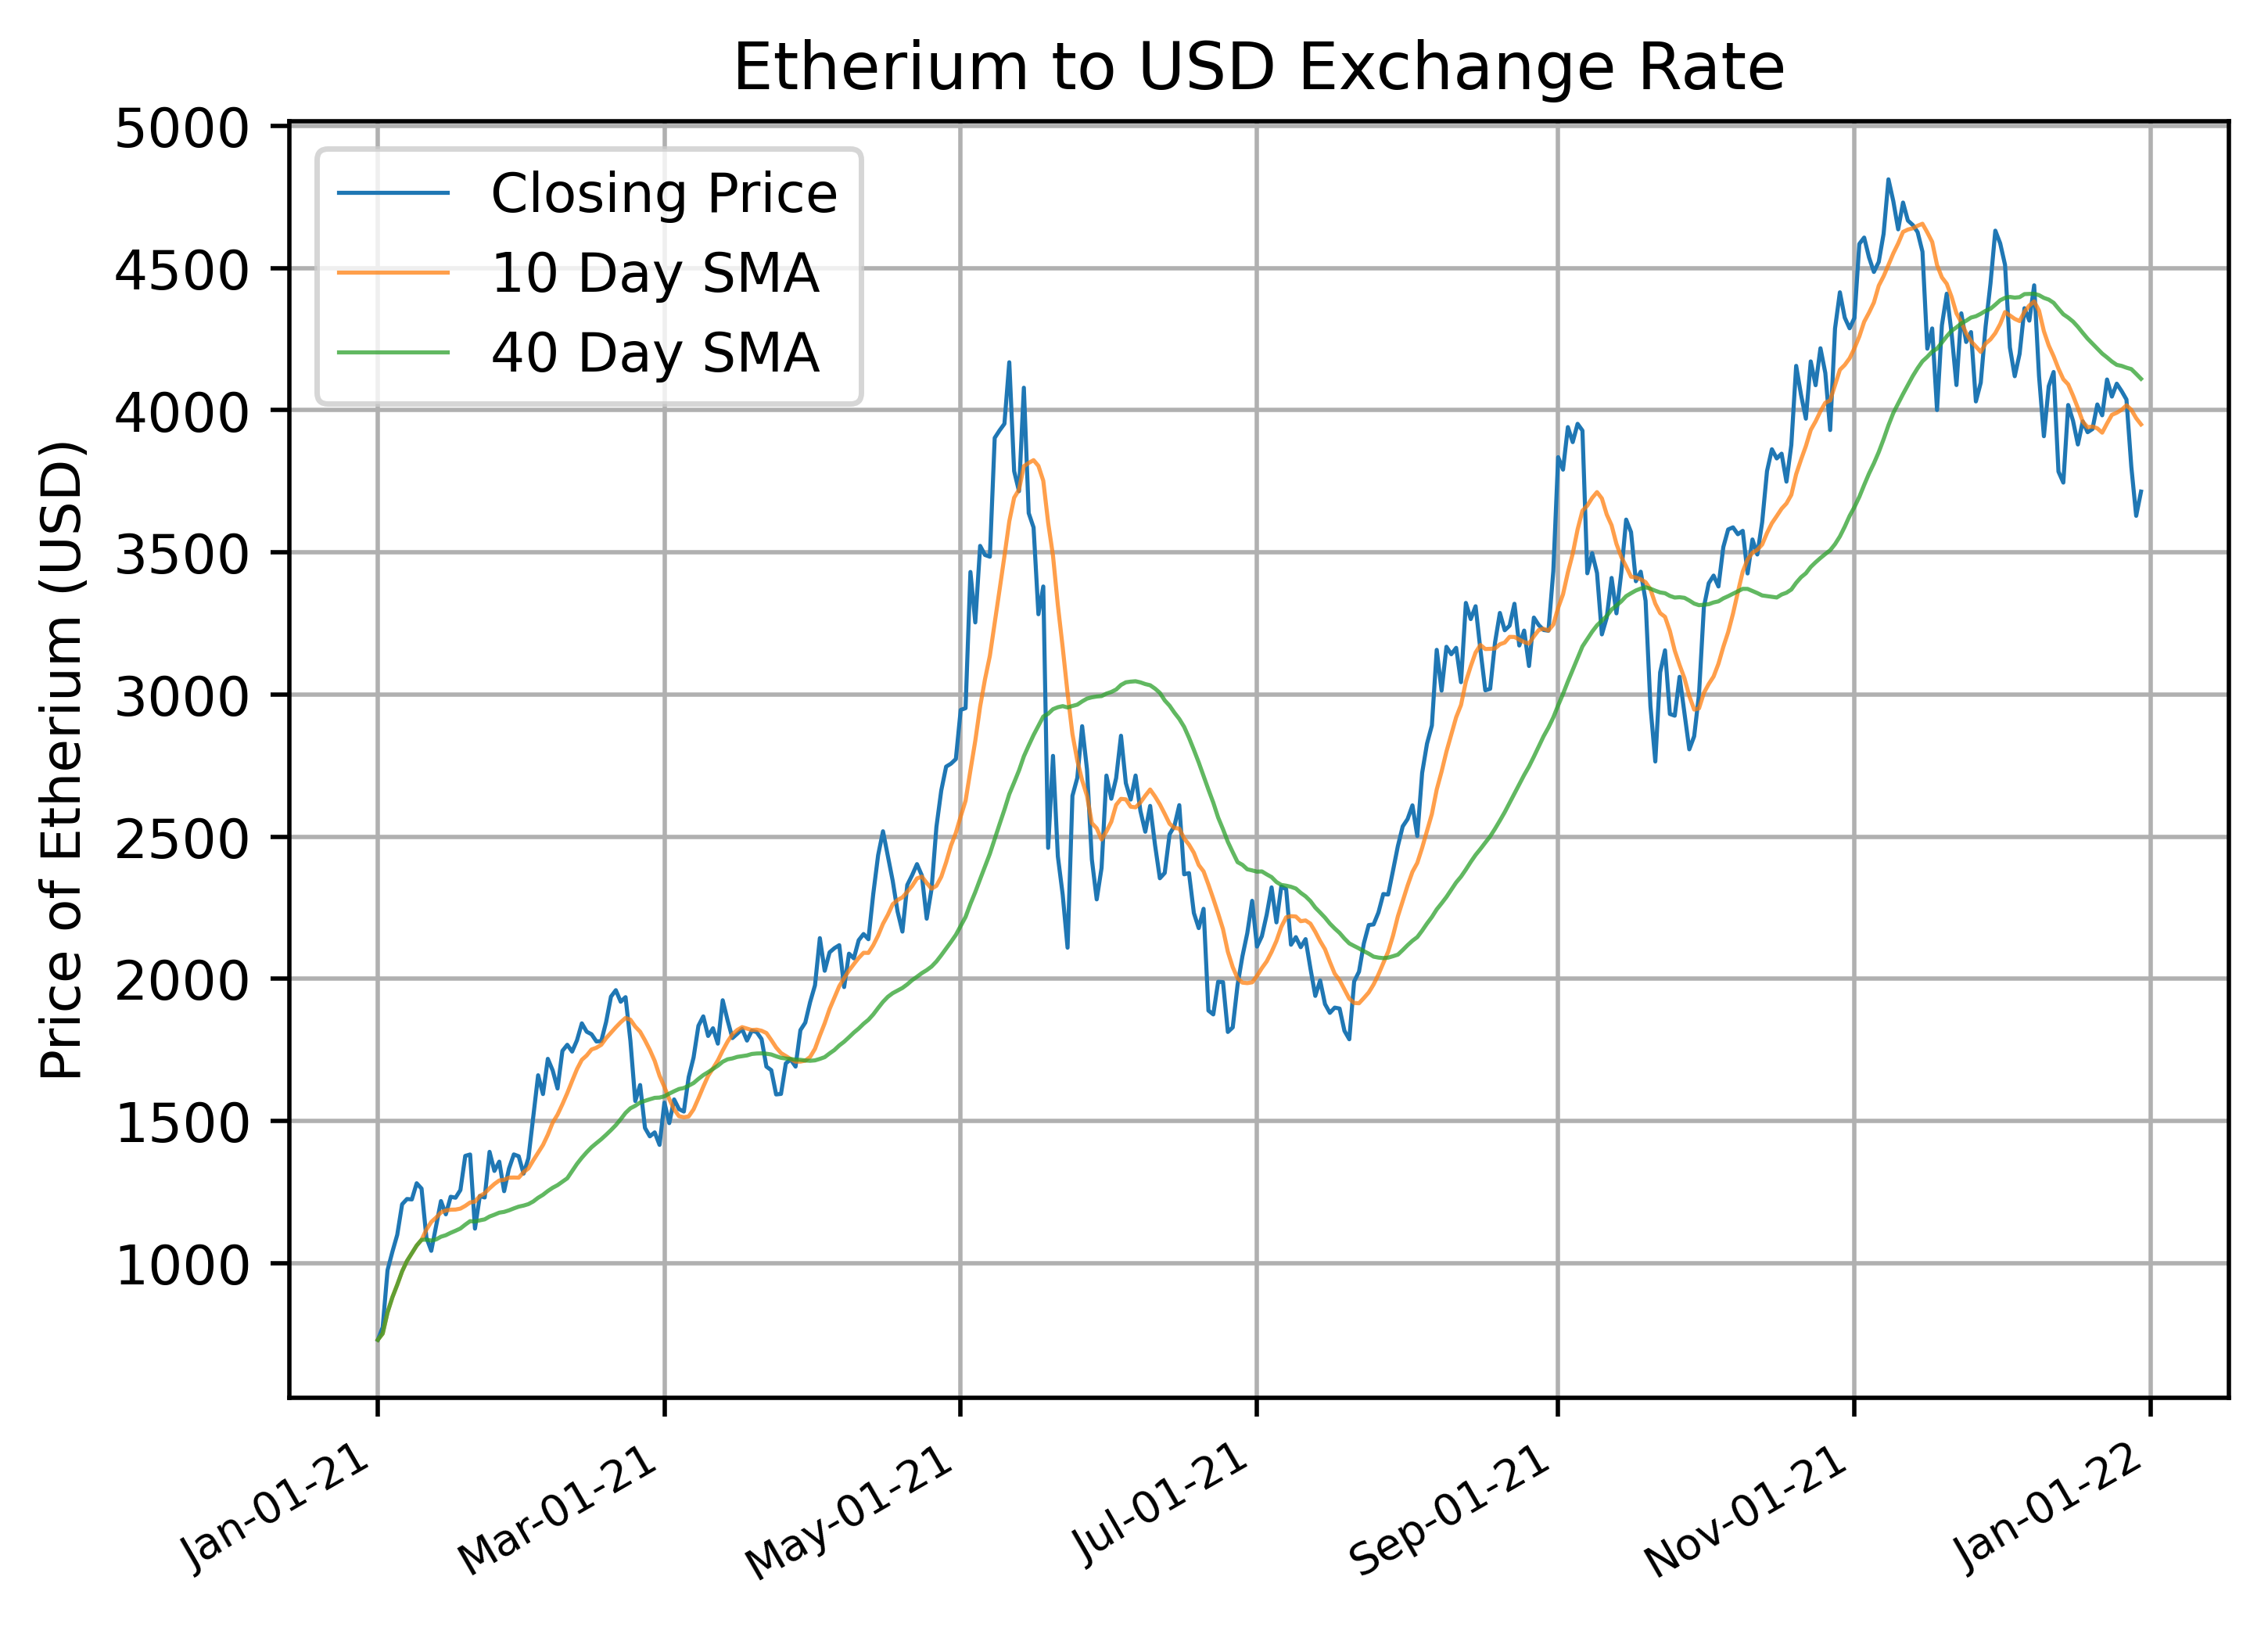

In [56]:
fig1, ax1 = plt.subplots(dpi=500)

date_format = DateFormatter("%h-%d-%y")
ax1.xaxis.set_major_formatter(date_format)
ax1.tick_params(axis='x', labelsize=8)
fig1.autofmt_xdate()


ax1.plot(ETH_USD['Close'], lw=0.75, label='Closing Price') # Added label

ax1.plot(ETH_USD['SMA_10'], lw=0.75, alpha=0.75, label='10 Day SMA')
ax1.plot(ETH_USD['SMA_40'], lw=0.75, alpha=0.75, label='40 Day SMA')


# Adding labels and title to the plot
ax1.set_ylabel('Price of Etherium (USD)')
ax1.set_title('Etherium to USD Exchange Rate')
ax1.grid() # adding a grid
ax1.legend() # adding a legend

# Displaying the price chart
plt.show()

In [57]:
trade_signals_ETC = pd.DataFrame(index=ETH_USD.index)

short_interval_ETC = 15
long_interval_ETC = 50

trade_signals_ETC['Short']=ETH_USD['Close'].rolling(window=short_interval_ETC, min_periods=1).mean()
trade_signals_ETC['Long'] = ETH_USD['Close'].rolling(window=long_interval_ETC, min_periods=1).mean()

In [58]:
trade_signals_ETC['Signal'] = 0.0

trade_signals_ETC['Signal'] = np.where(trade_signals_ETC['Short'] > trade_signals_ETC['Long'], 1.0, 0.0)   

trade_signals_ETC['Position']= trade_signals_ETC['Signal'].diff()

In [59]:
ETH_USD.head(10)

Open         High          Low        Close    Adj Close   
Date                                                                          
2021-01-01   737.708374   749.201843   719.792236   730.367554   730.367554  \
2021-01-02   730.402649   786.798462   718.109497   774.534973   774.534973   
2021-01-03   774.511841  1006.565002   771.561646   975.507690   975.507690   
2021-01-04   977.058838  1153.189209   912.305359  1040.233032  1040.233032   
2021-01-05  1041.498779  1129.371460   986.811279  1100.006104  1100.006104   
2021-01-06  1101.005005  1209.428589  1064.233398  1207.112183  1207.112183   
2021-01-07  1208.078369  1282.579590  1167.443115  1225.678101  1225.678101   
2021-01-08  1225.967896  1273.827515  1076.081543  1224.197144  1224.197144   
2021-01-09  1223.740479  1303.871826  1182.270386  1281.077271  1281.077271   
2021-01-10  1280.871094  1347.926147  1194.715576  1262.246704  1262.246704   

                 Volume       SMA_10       SMA_40  
Date                                               
2021-01-01  13652004358   730.367554   730.367554  
2021-01-02  19740771179   752.451263   752.451263  
2021-01-03  45200463368   826.803406   826.803406  
2021-01-04  56945985763   880.160812   880.160812  
2021-01-05  41535932781   924.129871   924.129871  
2021-01-06  44699914188   971.293589   971.293589  
2021-01-07  40468027280  1007.634234  1007.634234  
2021-01-08  44334826666  1034.704597  1034.704597  
2021-01-09  33233105361  1062.079339  1062.079339  
2021-01-10  40616938053  1082.096075  1082.096075

In [60]:
trade_signals_ETC.head(20)

Short         Long  Signal  Position
Date                                                  
2021-01-01   730.367554   730.367554     0.0       NaN
2021-01-02   752.451263   752.451263     0.0       0.0
2021-01-03   826.803406   826.803406     0.0       0.0
2021-01-04   880.160812   880.160812     0.0       0.0
2021-01-05   924.129871   924.129871     0.0       0.0
2021-01-06   971.293589   971.293589     0.0       0.0
2021-01-07  1007.634234  1007.634234     0.0       0.0
2021-01-08  1034.704597  1034.704597     0.0       0.0
2021-01-09  1062.079339  1062.079339     0.0       0.0
2021-01-10  1082.096075  1082.096075     0.0       0.0
2021-01-11  1082.827831  1082.827831     0.0       0.0
2021-01-12  1079.545059  1079.545059     0.0       0.0
2021-01-13  1083.483084  1083.483084     0.0       0.0
2021-01-14  1093.123792  1093.123792     0.0       0.0
2021-01-15  1098.371179  1098.371179     0.0       0.0
2021-01-16  1131.915849  1106.819080     1.0       1.0
2021-01-17  1162.291667  1114.075149     1.0       0.0
2021-01-18  1181.076457  1122.030948     1.0       0.0
2021-01-19  1203.547314  1135.465946     1.0       0.0
2021-01-20  1222.365177  1147.806351     1.0       0.0

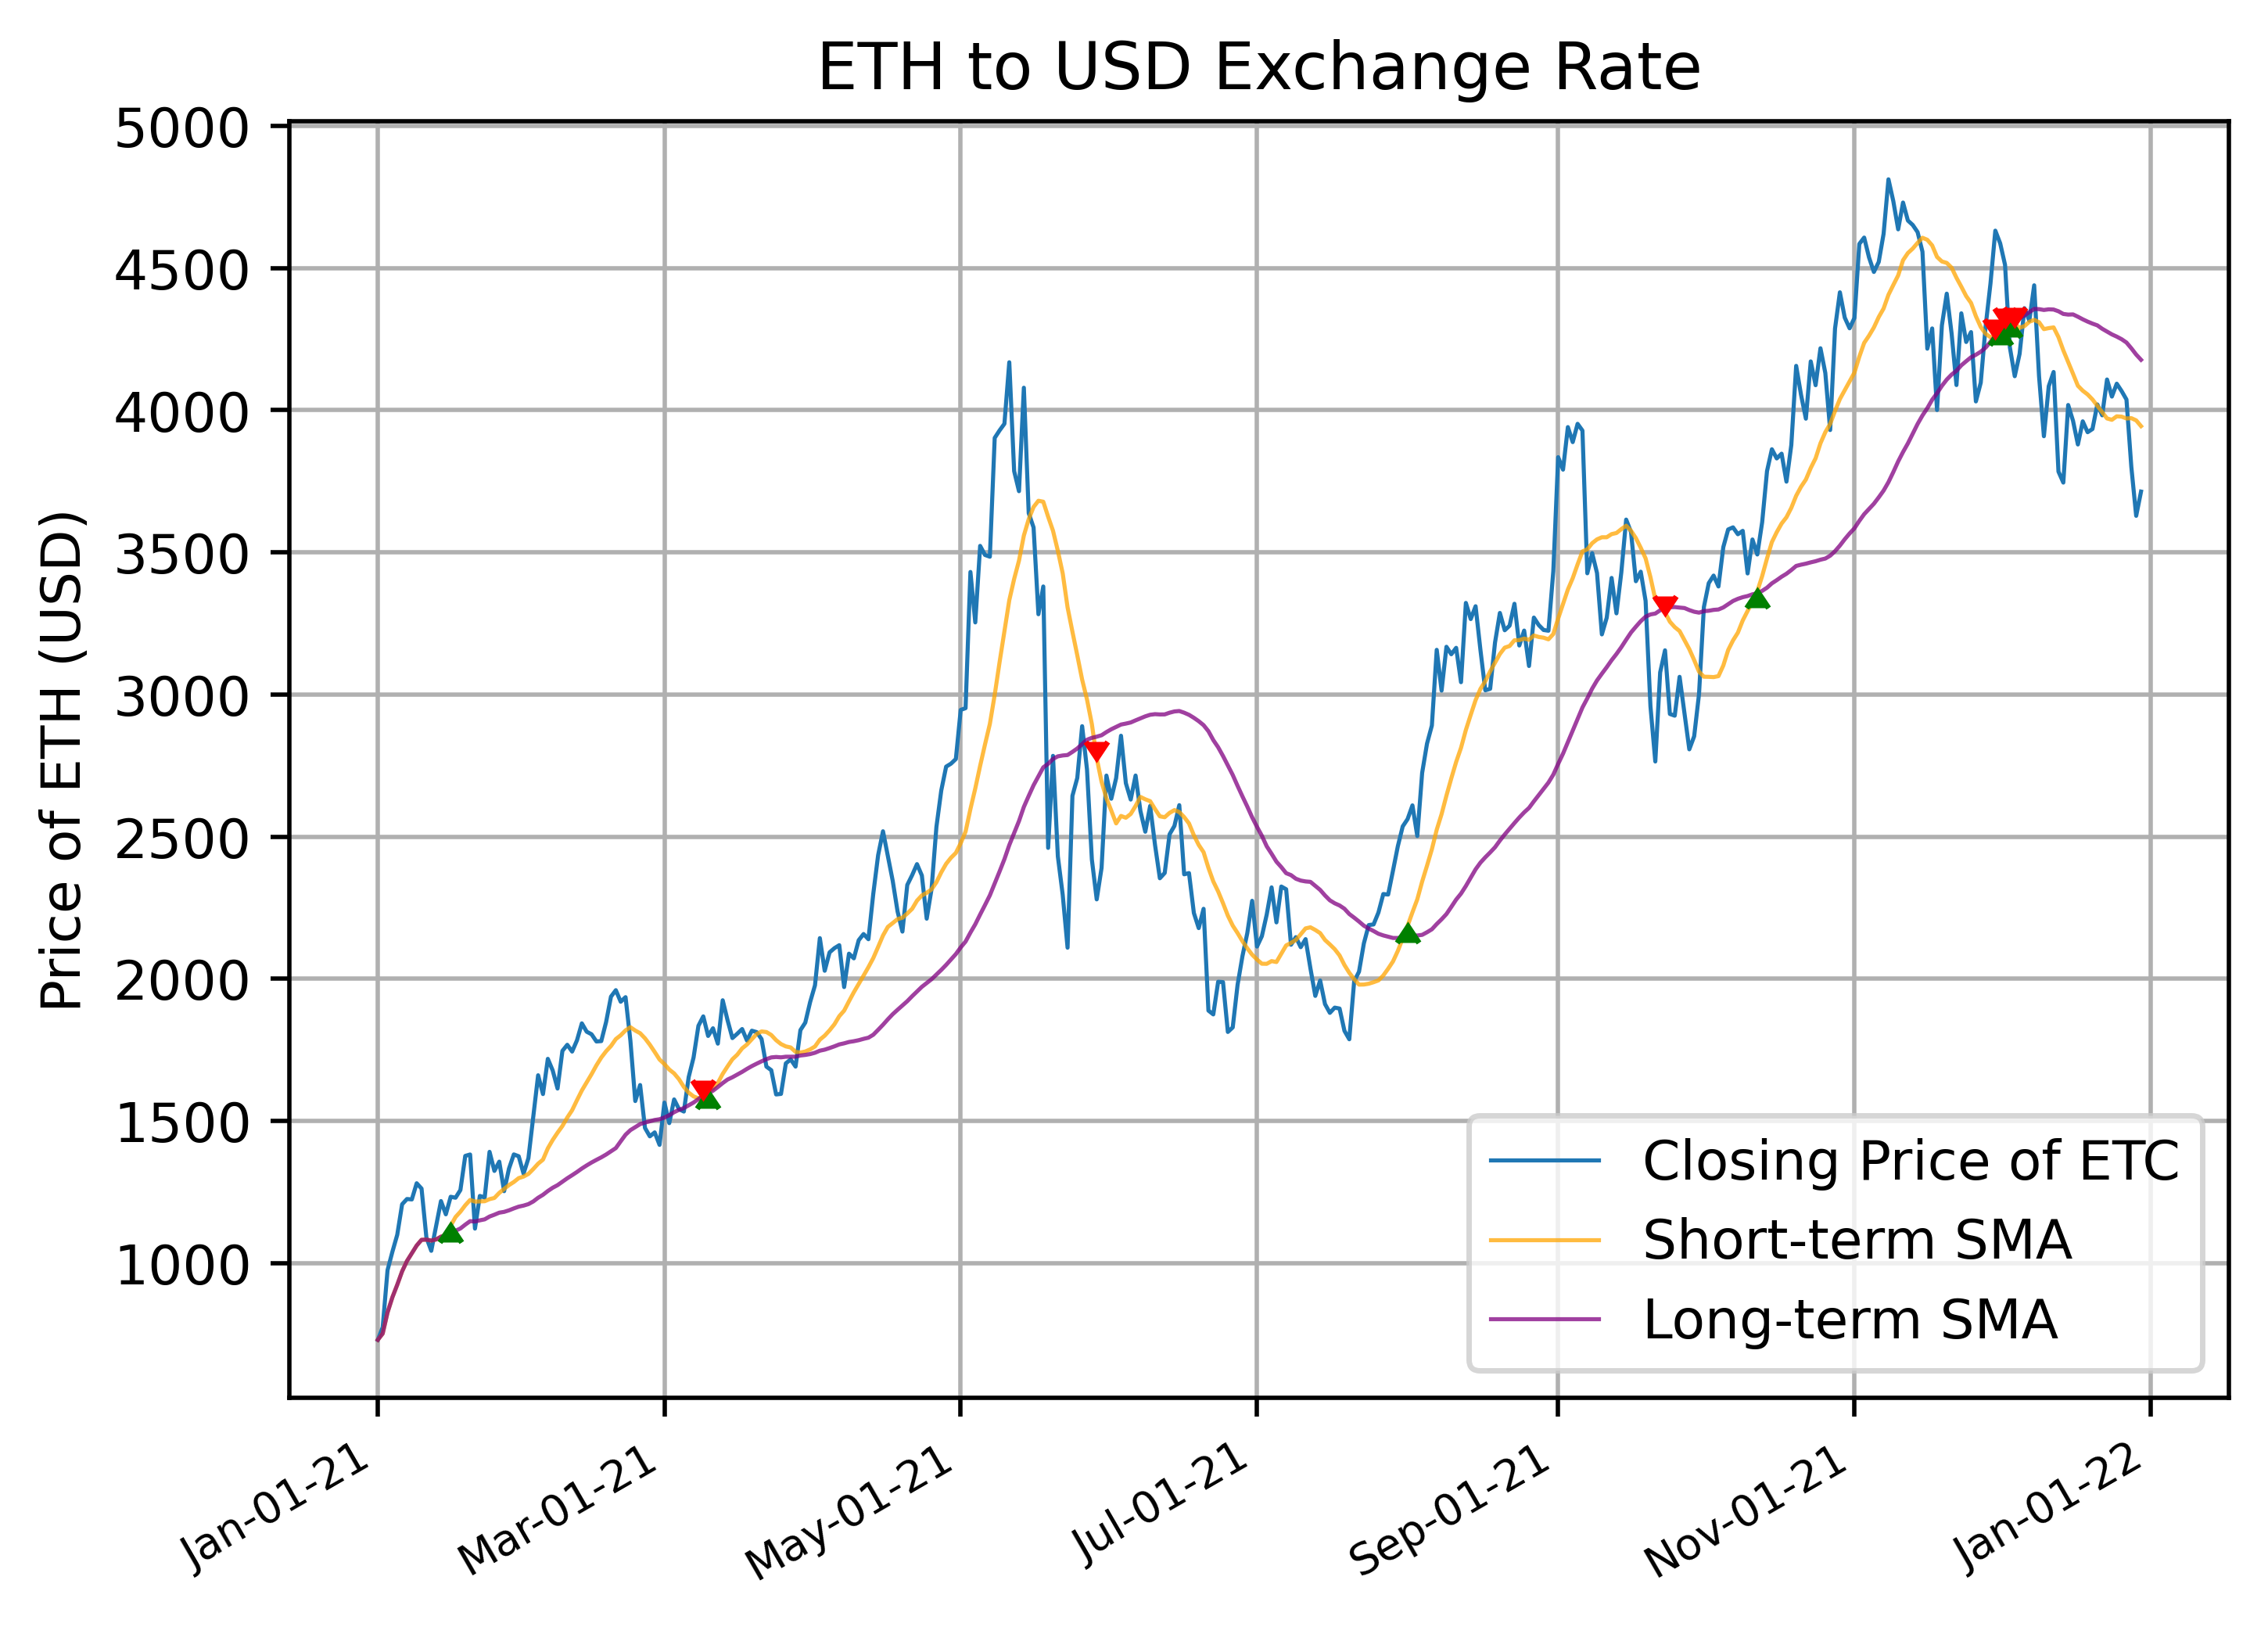

In [61]:
fig1, ax1 = plt.subplots(dpi=500)

# Formatting the date axis
date_format = DateFormatter("%h-%d-%y")
ax1.xaxis.set_major_formatter(date_format)
ax1.tick_params(axis='x', labelsize=8)
fig1.autofmt_xdate()


# Plotting the Bitcoin closing price against the date (1 day interval)
ax1.plot(ETH_USD['Close'], lw=0.75, label='Closing Price of ETC')

# Plot the shorter-term moving average
ax1.plot(trade_signals_ETC['Short'], lw=0.75, alpha=0.75, color='orange', label='Short-term SMA')

# Plot the longer-term moving average
ax1.plot(trade_signals_ETC['Long'], lw=0.75, alpha=0.75, color='purple', label='Long-term SMA')


# Adding green arrows to indicate buy orders
ax1.plot(trade_signals_ETC.loc[trade_signals_ETC['Position']==1.0].index, trade_signals_ETC.Short[trade_signals_ETC['Position'] == 1.0],
 marker=6, ms=4, linestyle='none', color='green')

 # Adding red arrows to indicate sell orders
ax1.plot(trade_signals_ETC.loc[trade_signals_ETC['Position'] == -1.0].index, trade_signals_ETC.Short[trade_signals_ETC['Position'] == -1.0],
 marker=7, ms=4, linestyle='none', color='red')


# Adding labels and title to the plot
ax1.set_ylabel('Price of ETH (USD)')
ax1.set_title('ETH to USD Exchange Rate')
ax1.grid() # adding a grid
ax1.legend() # adding a legend

# Displaying the price chart
plt.show()

In [62]:
# Define how much money you will start with (in USD)
initial_balance_ETC = 10000.0 # ten thousand USD

# Create dataframe containing all the dates considered
backtest_ETC = pd.DataFrame(index=trade_signals_ETC.index)

# Add column containing the daily percent returns of Bitcoin
backtest_ETC['ETH_Return'] = ETH_USD['Close'] / ETH_USD['Close'].shift(1) # Current closing price / yesterday's closing price


In [63]:

# Add column containing the daily percent returns of the Moving Average Crossover strategy
backtest_ETC['Alg_Return'] = np.where(trade_signals_ETC.Signal == 1, backtest_ETC.ETH_Return, 1.0)

# Add column containing the daily value of the portfolio using the Crossover strategy
backtest_ETC['Balance'] = initial_balance_ETC * backtest_ETC.Alg_Return.cumprod() # cumulative product

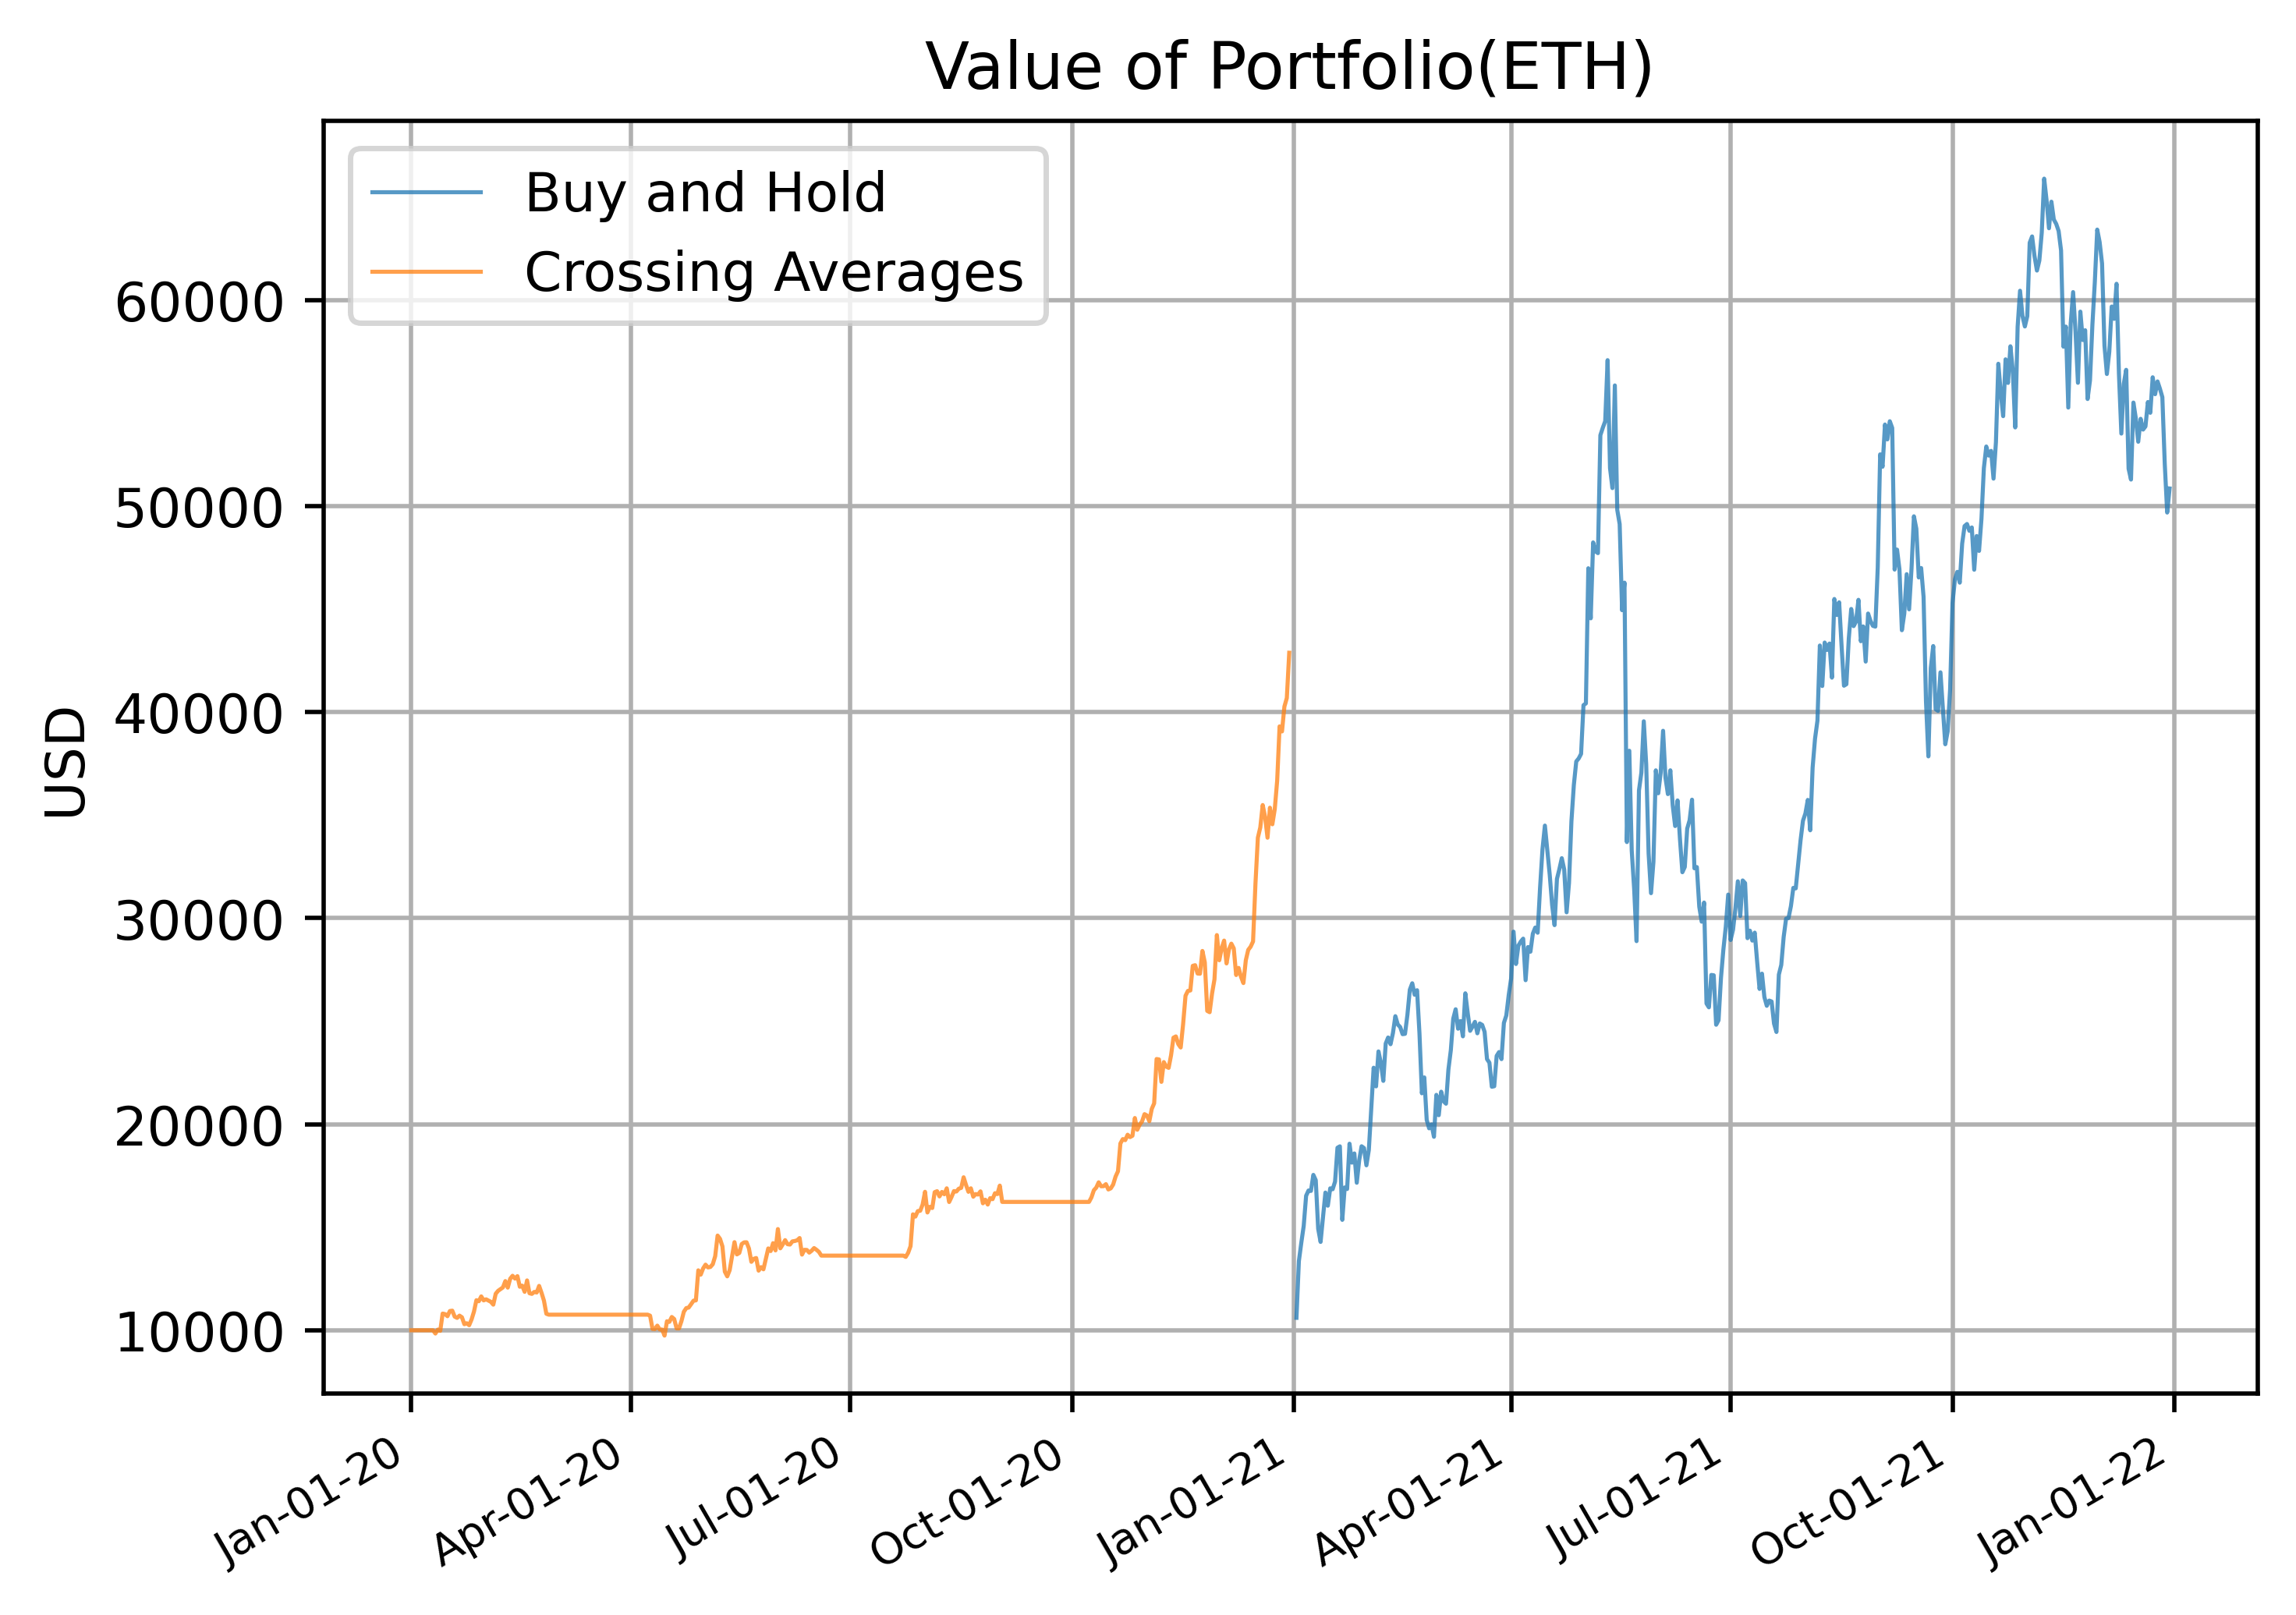

In [64]:
fig1, ax1 = plt.subplots(dpi=500)

# Formatting the date axis
date_format = DateFormatter("%h-%d-%y")
ax1.xaxis.set_major_formatter(date_format)
ax1.tick_params(axis='x', labelsize=8)
fig1.autofmt_xdate()

# Plotting the value of Buy and Hold Strategy
ax1.plot(initial_balance_ETC*backtest_ETC.ETH_Return.cumprod(), lw=0.75, alpha=0.75, label='Buy and Hold')

# Plotting total value of Crossing Averages Strategy
ax1.plot(backtest['Balance'], lw=0.75, alpha=0.75, label='Crossing Averages')

# Adding labels and title to the plot
ax1.set_ylabel('USD')
ax1.set_title('Value of Portfolio(ETH)')
ax1.grid() # adding a grid
ax1.legend() # adding a legend

# Displaying the price chart
plt.show()